<a href="https://colab.research.google.com/github/Aditi81/credit_card_fraud_detection/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problem statement - Identify fraudulent credit card transactions.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Make your machine learning model learn to detect these anomalous transactions


#Data Loading

First go to our account page on Kaggle to generate an API token. On the account page, we scroll down to API section. If there is a previously generated API token, we should expire it by clicking on “Expire API Token”. If not, we can directly generate a token clicking on “Create New API Token”. When clicked on, a file named kaggle.json will be download. And than run the following command 

In [ ]:
# Importing library to upload files
from google.colab import files

In [ ]:
# Installing kaggle library
!pip install -q kaggle

In [ ]:
# Uploading the files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Make a directory named 'kaggle' in root folder. This will let you know if 
# any directory is already present
!mkdir ~/.kaggle 

In [ ]:
# Copy the jason file there. This should also give you an user access warning
!cp kaggle.json ~/.kaggle/

In [ ]:
# Change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the data through kaggle API
!kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:01<00:00, 31.6MB/s]
100% 66.0M/66.0M [00:01<00:00, 54.5MB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('creditcard.csv')

#Data Analysis

In Data Analysis We will Analyze To Find out the below points
* Categorical Variables
* Cardinality of Categorical Variables 
* Missing Values
* Univariant analysis of all The Numerical Variables
* Distribution of the Numerical Variables
* Feature Correlation
* Outliers
* Relationship between independent and dependent feature


In [ ]:
# print shape of dataset with rows and columns
print(train.shape)

(284807, 31)


In [ ]:
# print the top5 records
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# to print the full summary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O' or train[feature].dtypes== 'int64']
print(categorical_features)

['Class']


In our dataset we have only one categorical features '**Class**' , k is the original number of unique values in your data column. High cardinality means a lot of unique values ( a large k). A column with hundreds of zip codes is an example of a high cardinality feature. High cardinality theme bird. High dimensionality means a matrix with many dimensions. So we don't have high cardinality present in the dataset.

In [ ]:
discrete_feature=[feature for feature in train.columns if len(train[feature].unique())<25 and feature not in ['Class']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


I checked if any column is having more than 25 unique values so we classified it as discrete feature, But it seem that we have only continous values only.

In [ ]:
# step make the list of features which has missing values
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]
# print the missing features list
print(len(features_with_na))

0


We don't have any missing values 

#Data Unbalance

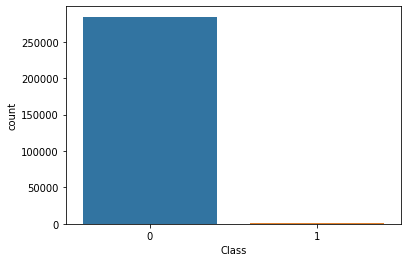

Percent of fraud transaction:  0.1727485630620034 %
Percent of normal transaction:  99.82725143693798 %


In [ ]:
sns.countplot(train['Class'])
plt.show()
print('Percent of fraud transaction: ',len(train[train['Class']==1])/len(train['Class'])*100,"%")
print('Percent of normal transaction: ',len(train[train['Class']==0])/len(train['Class'])*100,"%")

Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

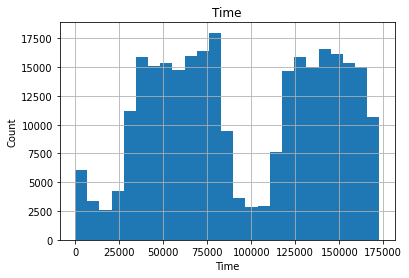

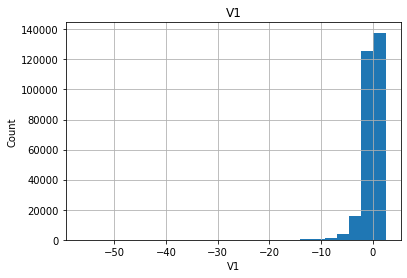

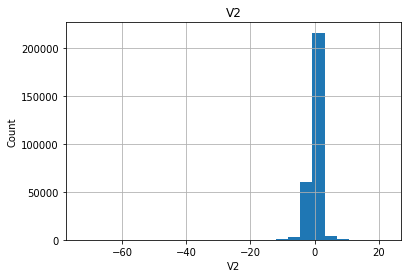

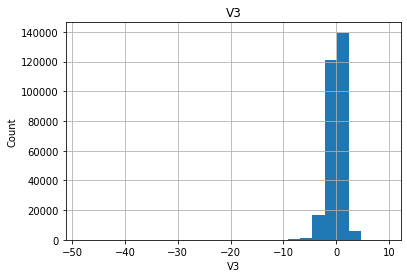

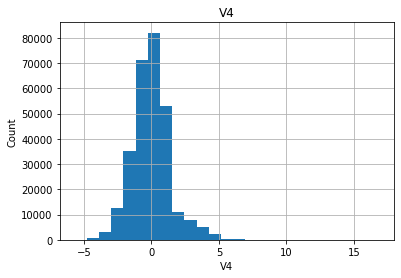

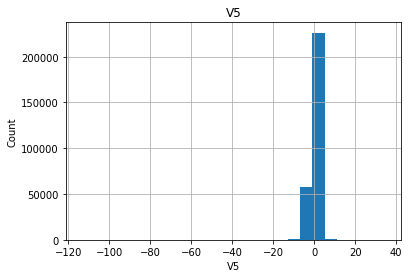

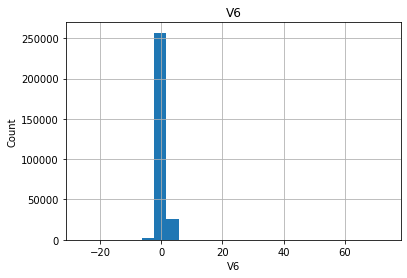

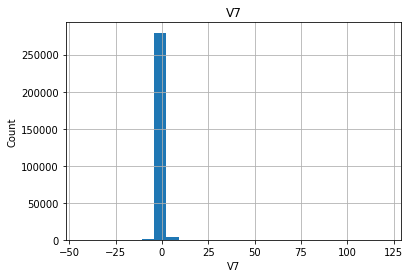

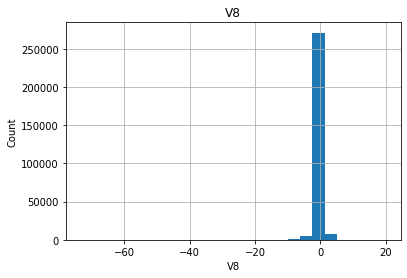

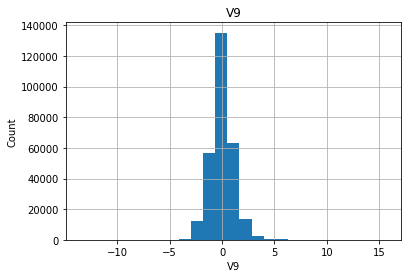

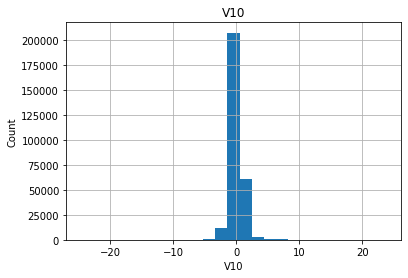

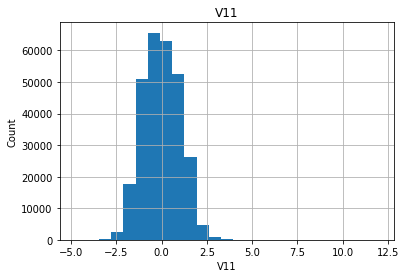

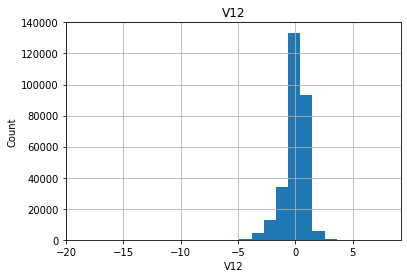

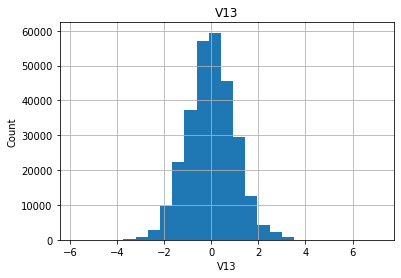

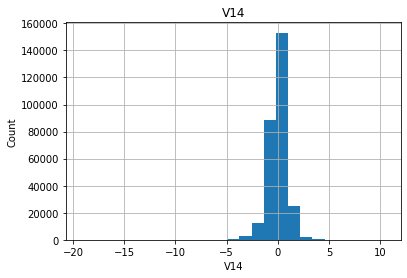

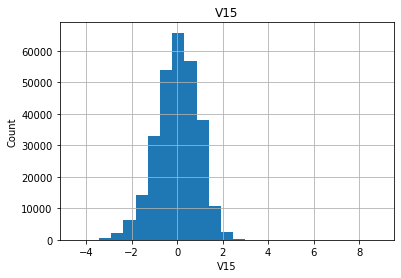

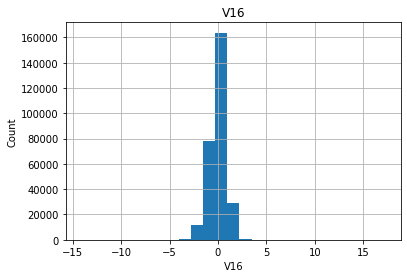

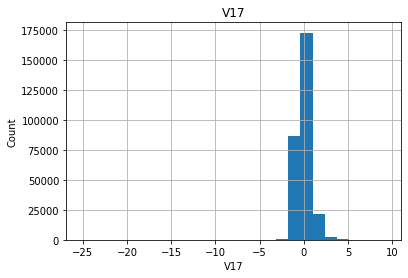

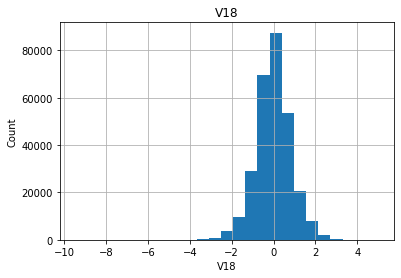

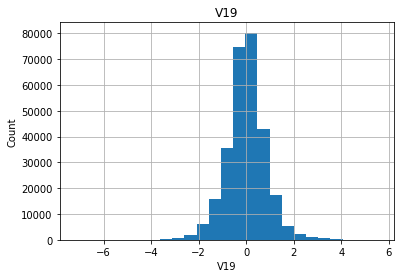

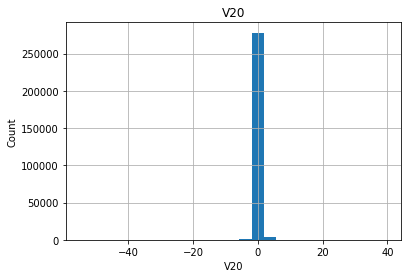

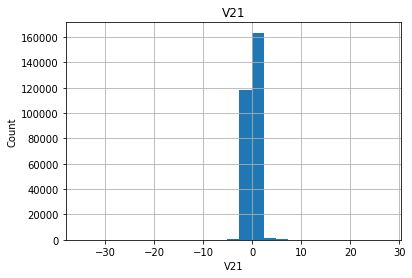

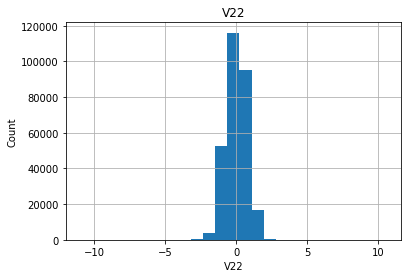

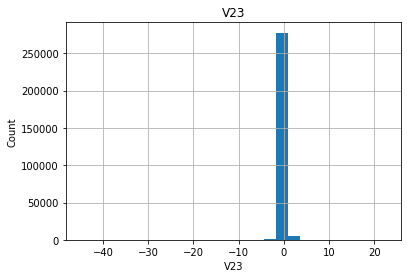

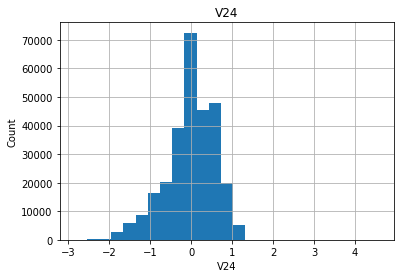

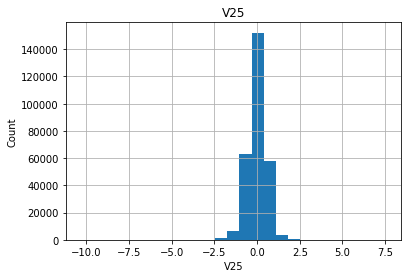

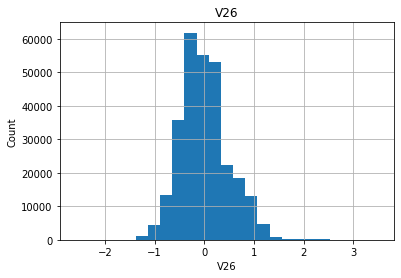

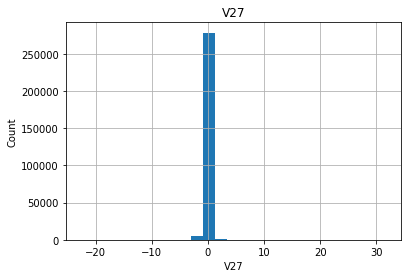

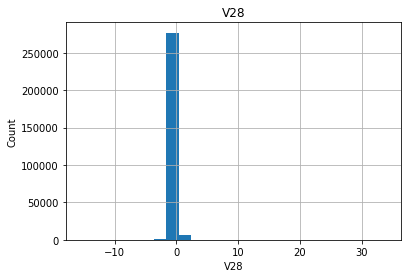

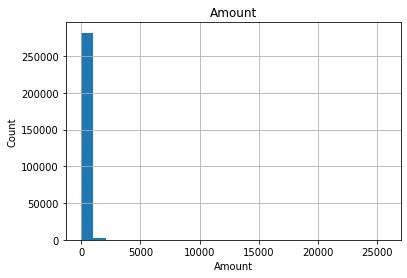

In [ ]:
# Lets analyse the continuous values by creating histograms to understand the distribution
data=train.copy()
data.drop(columns='Class', inplace = True)

for feature in data.columns:
    train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Normalization is important in PCA since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance.

since V1, V2, … V28 are the principal components obtained with PCA we can clearly see that from above plot that from V1 to V28 variables are normalized. Variable 'Time' and 'Amount' is not normalized.

In [ ]:
#figure_factory module contains dedicated functions for creating very specific types of plots
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
class_0 = train.loc[train['Class'] == 0]["Time"]
class_1 = train.loc[train['Class'] == 1]["Time"]
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

**Credit Card Transactions Time Density Plot** visualises the distribution of '**Not Fraud**' and '**Fraud**' transaction over a continuous interval or time period. 

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time.

So 'Time' feature can't tell whether the trasaction is Fraudulent transactions or not.

#Features correlation

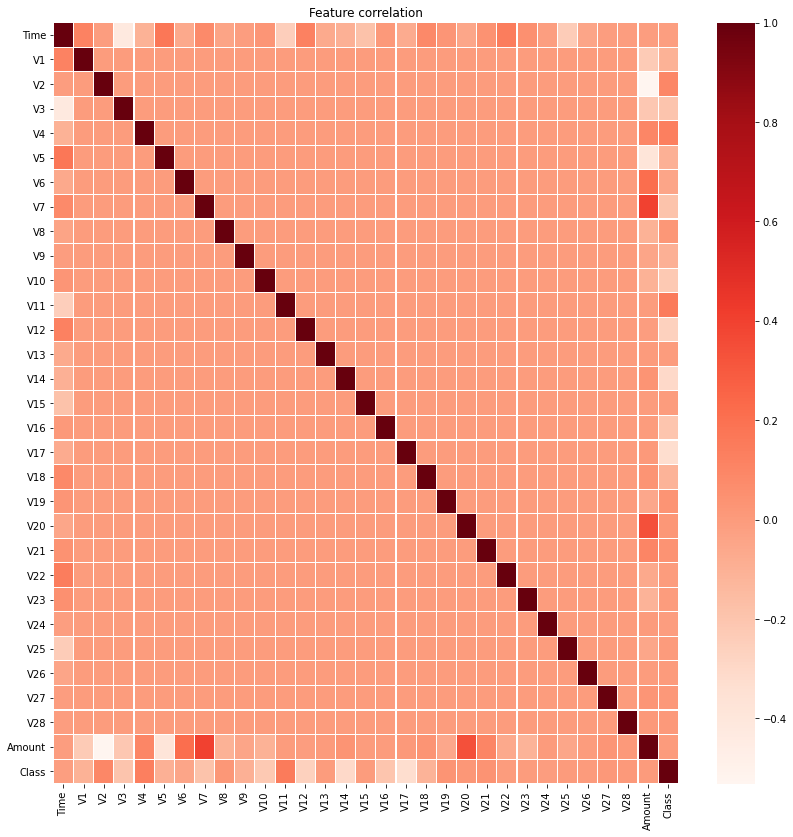

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Feature correlation')
corr = train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

Correlation is **Positive** when the values **increase together**, and Correlation is **Negative** when one value **decreases as the other increases**

Correlation can have a value:

* 1 is a perfect positive correlation (between 'Amount' and V7, 'Amount' And 'V20')
* 0 is no correlation (**between features V1-V28**)
* -1 is a perfect negative correlation (between 'Time' and V3, 'Amount' and V2, 'Amount' and V5)

# Outliers

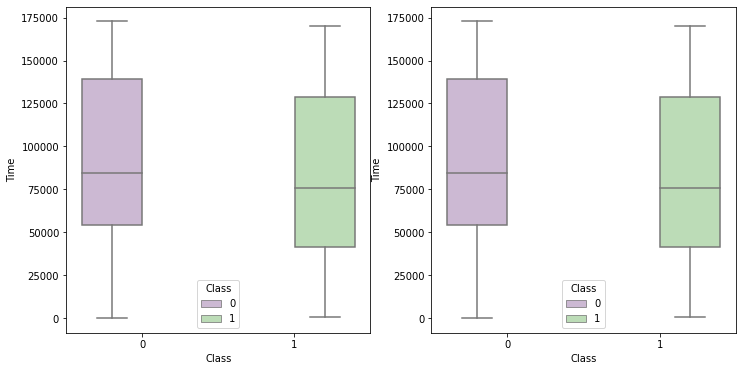

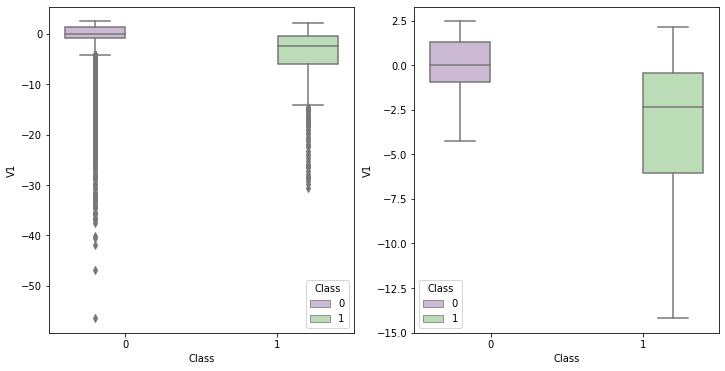

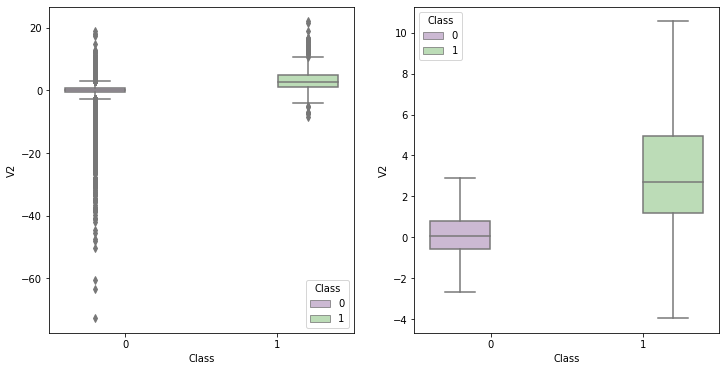

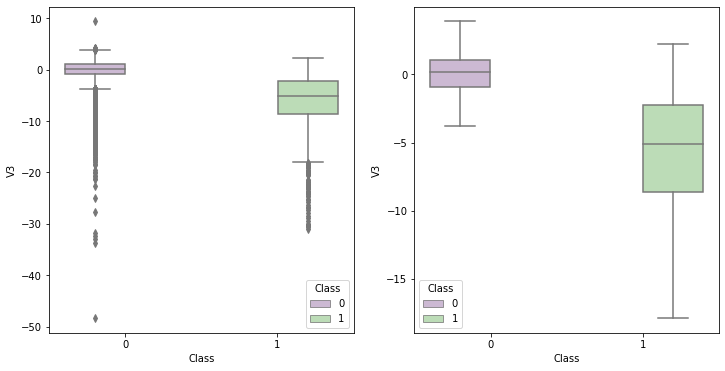

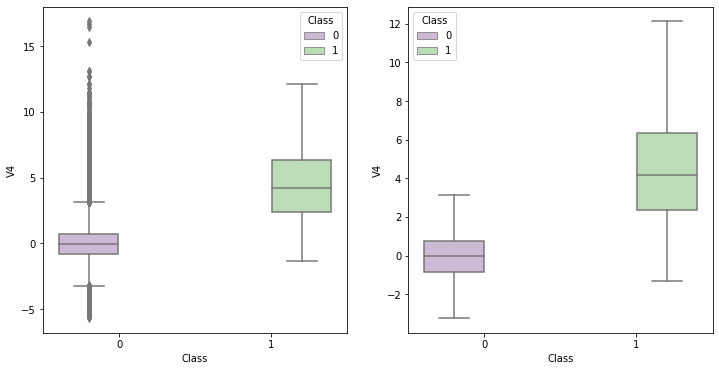

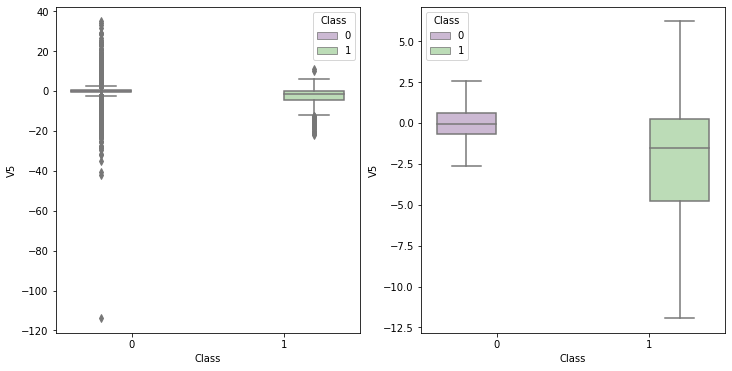

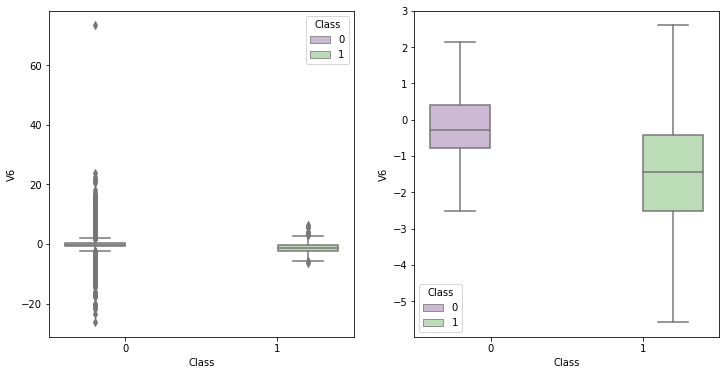

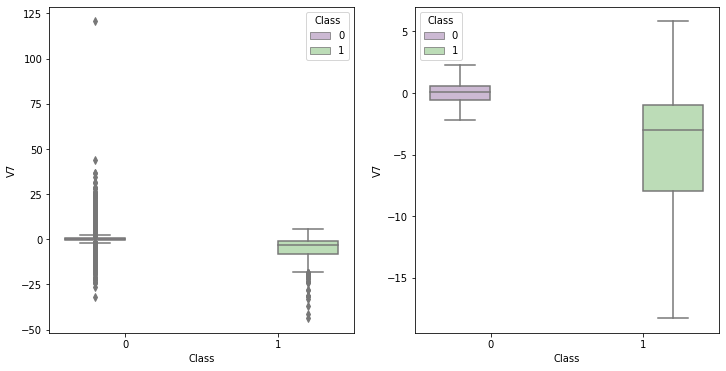

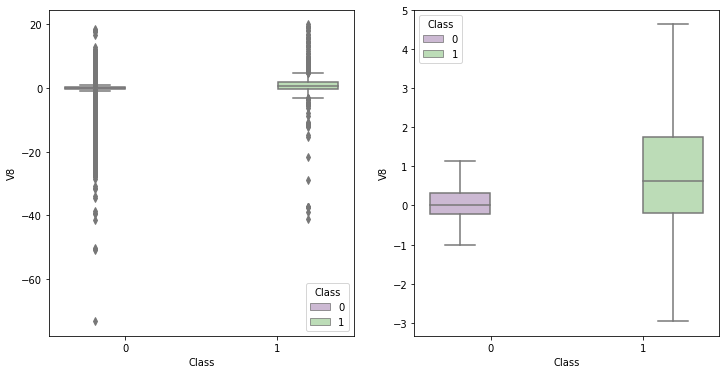

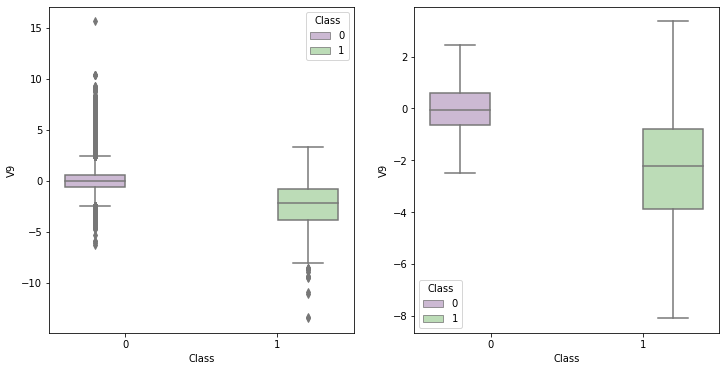

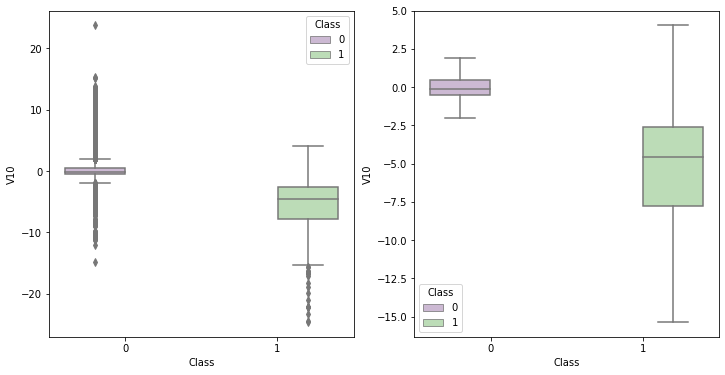

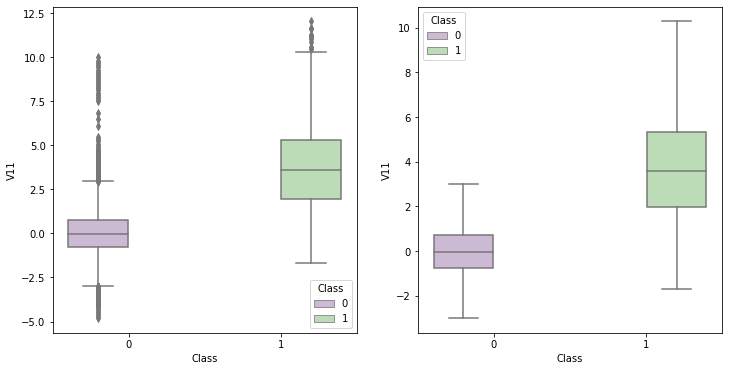

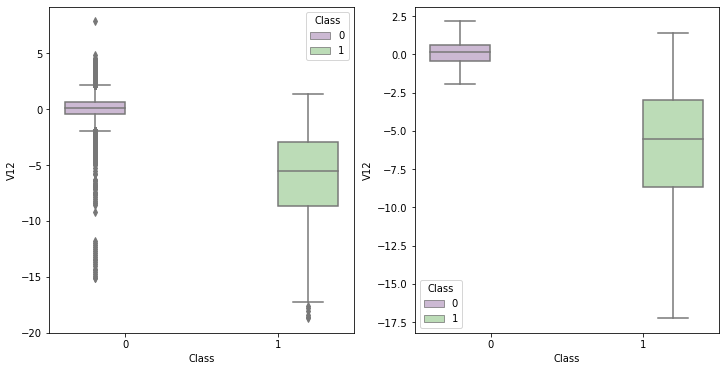

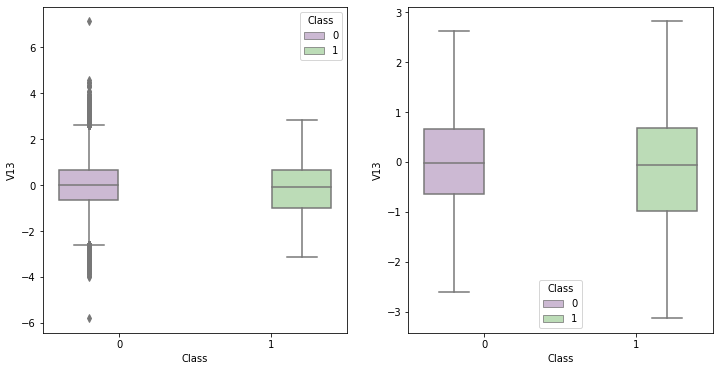

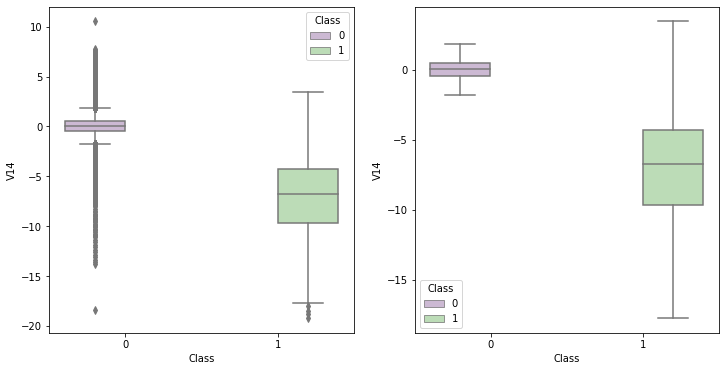

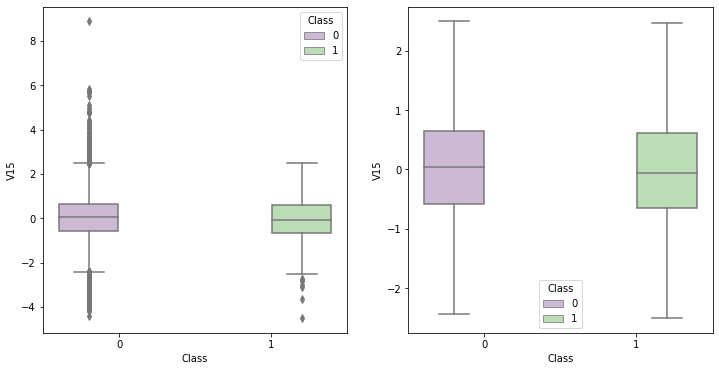

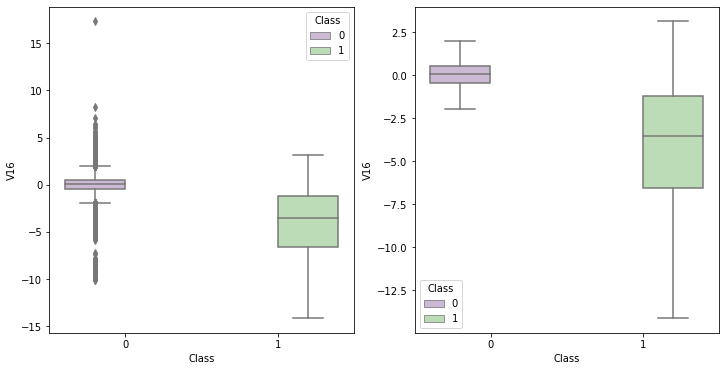

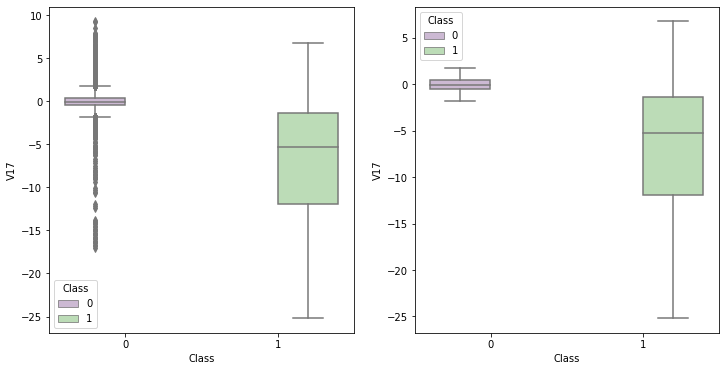

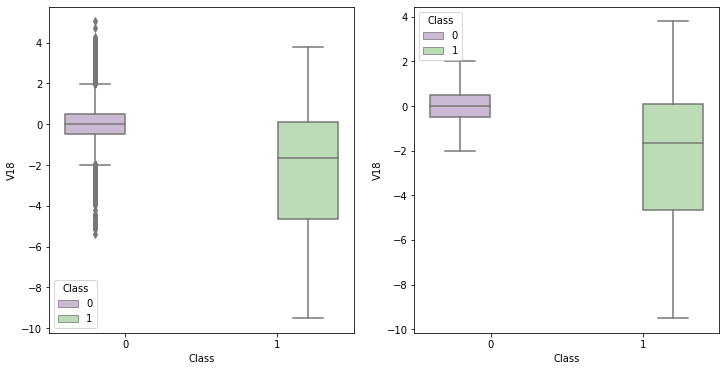

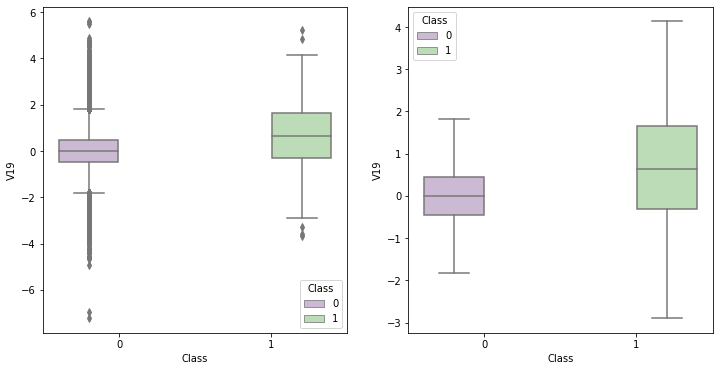

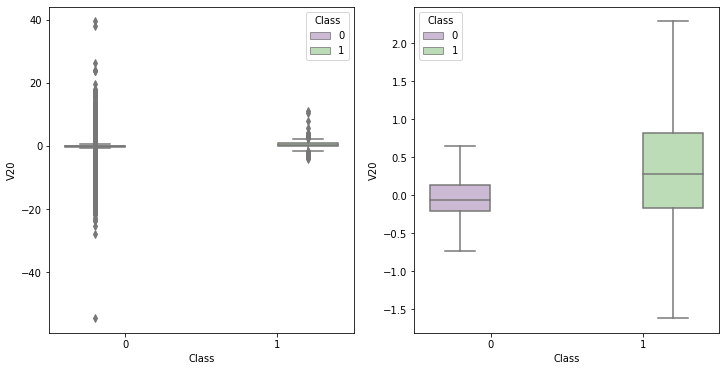

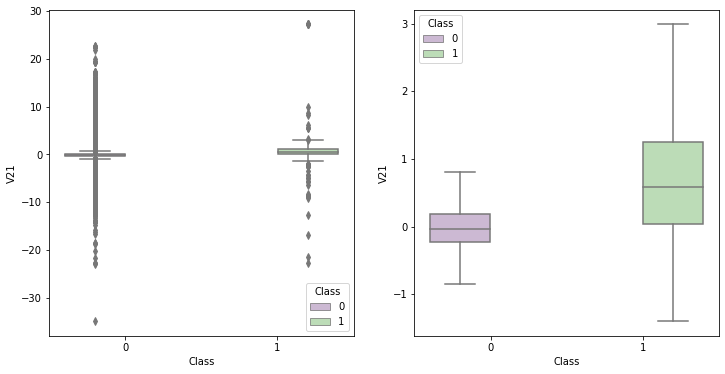

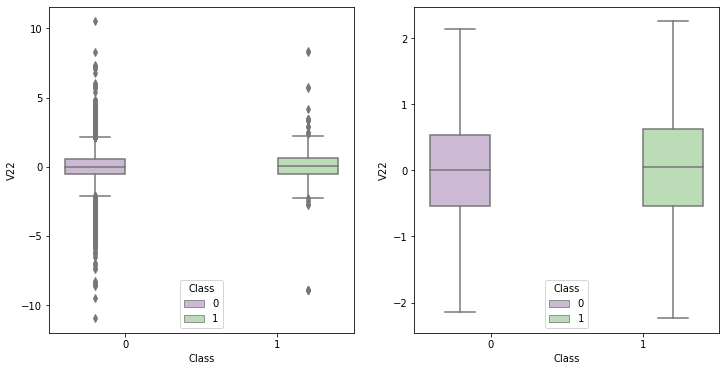

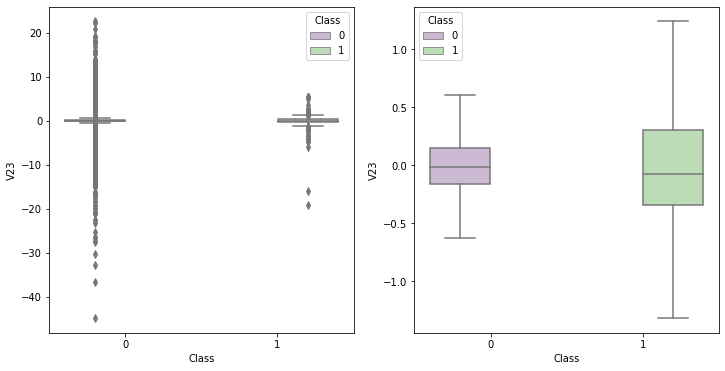

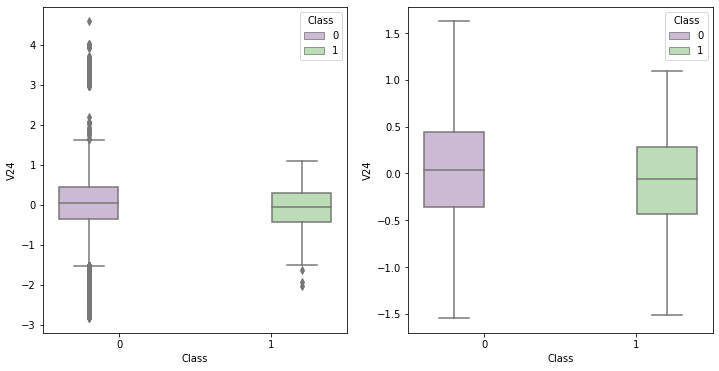

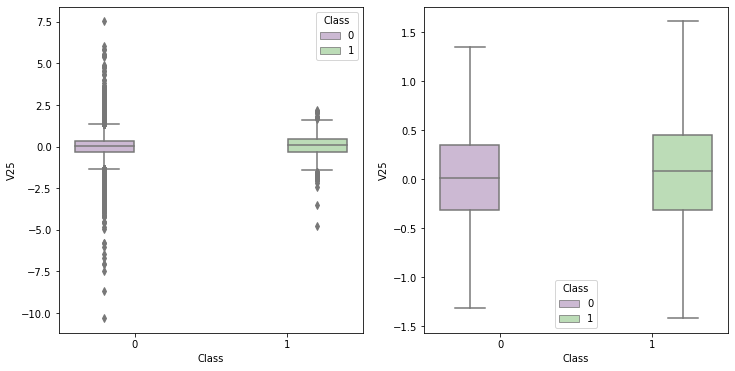

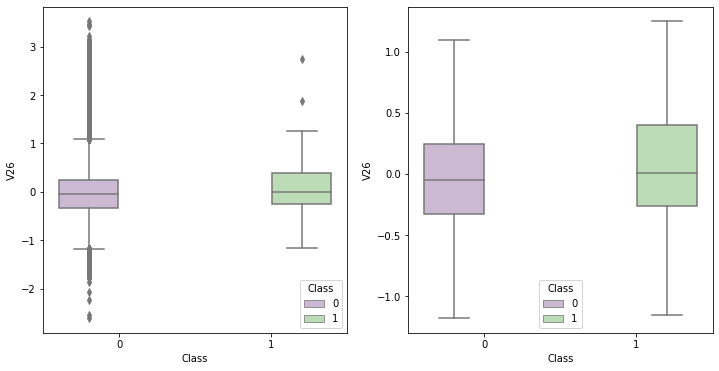

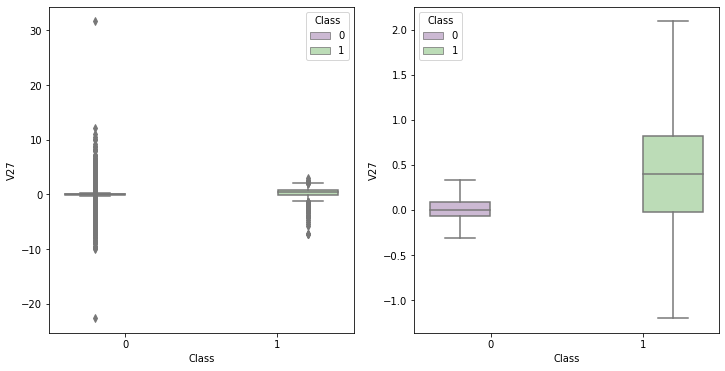

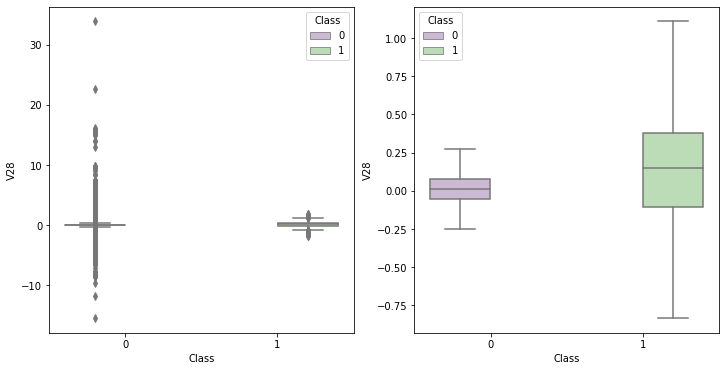

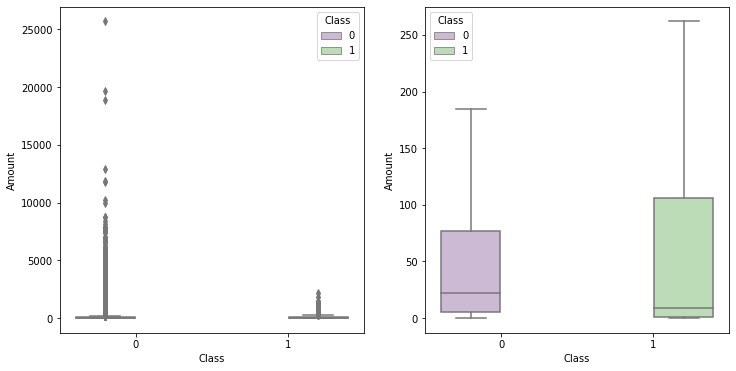

In [ ]:
# Transaction amount 
data=train.copy()
data.drop(columns=['Class'], inplace = True)
for i in data.columns:
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
  s = sns.boxplot(ax = ax1, x="Class", y=i, hue="Class",data=train, palette="PRGn",showfliers=True)
  s = sns.boxplot(ax = ax2, x="Class", y=i, hue="Class",data=train, palette="PRGn",showfliers=False)
  plt.show();

Above Box plot say fradulant transaction has more outlier than non fradulant transaction. Since our data is highly imbalance and we have less amount frudulant trasaction so traforming outlier leads to loss of infomation. we will use outlier as it is.

<Figure size 432x288 with 0 Axes>

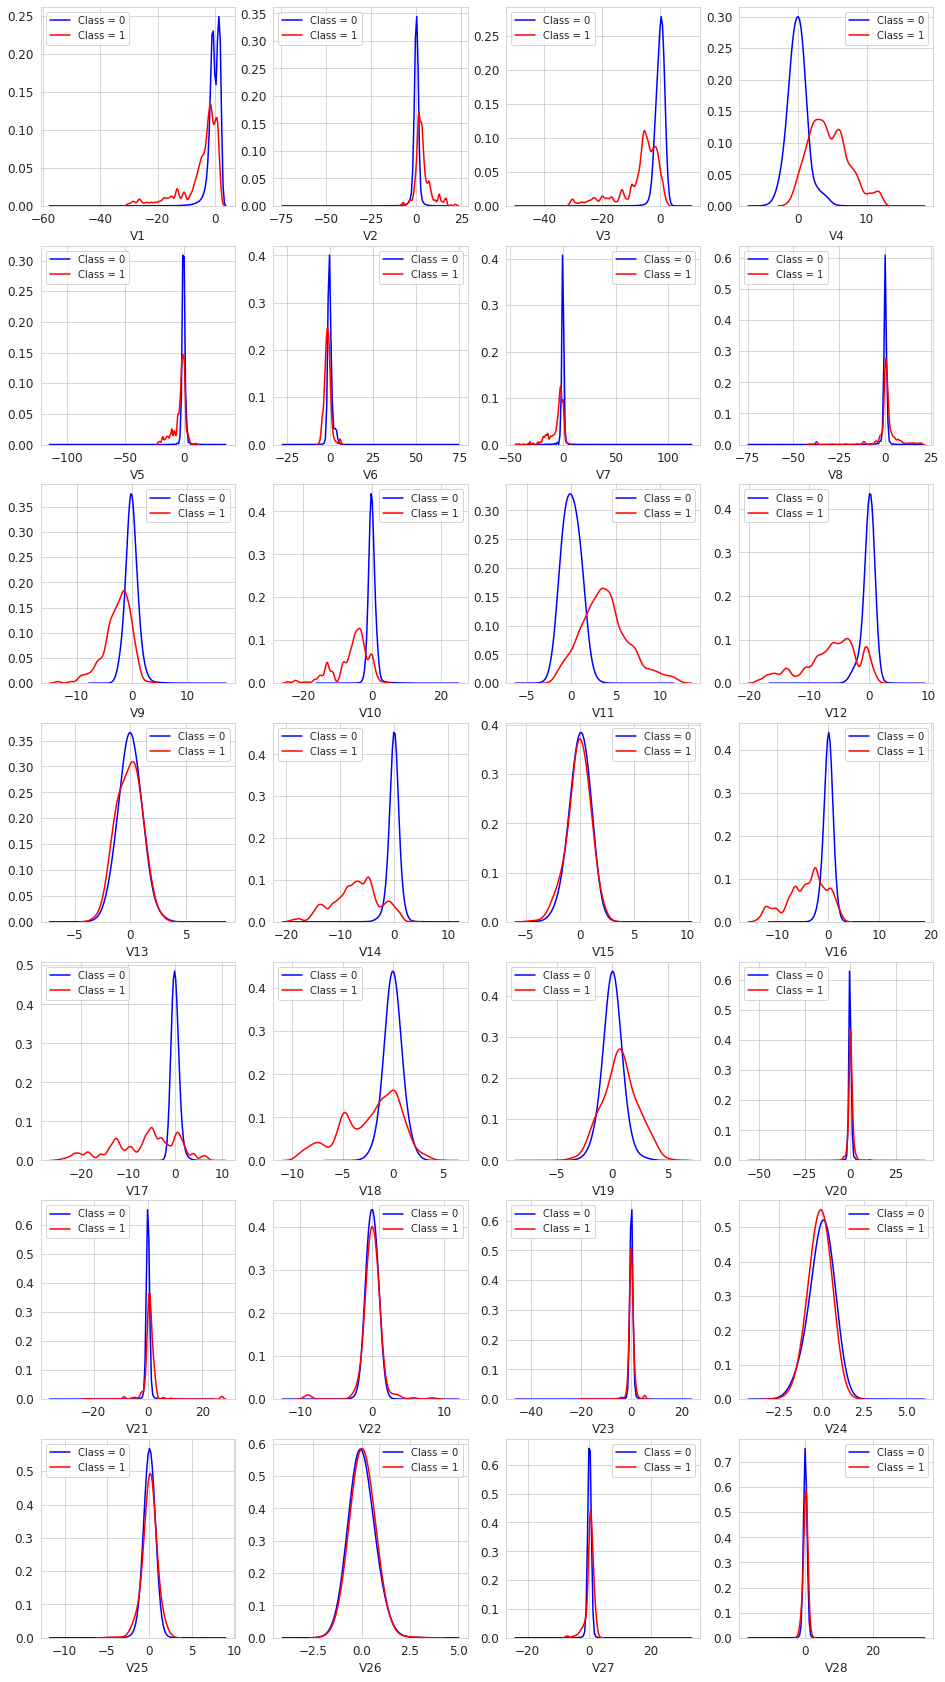

In [ ]:
#Features density plot
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28']

i = 0
t0 = train.loc[train['Class'] == 0]
t1 = train.loc[train['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,30))

for feature in col:
    i += 1
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0", color='b')
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1", color='r')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

Observation:

* V3, V4, V10, V11, V17-V19 have clearly separated distributions for Class values 0 and 1
* V1, V2, V7, V9, V12, V14, V16, V18 have partially saperated distribution for Class 0 and 1
* V13, V15, ,V20, V22-V28 have almost similar distribution for Class 0 and 1
* V5, V6, V8, V21 have quite similar distribution for Class 0 and 1

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

Text(0.5, 1.0, 'V1-V28 Skewnesses for Class 0')

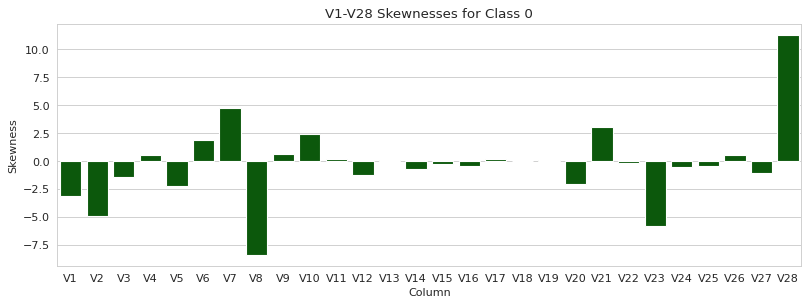

In [ ]:
pca_vars = ['V%i' % k for k in range(1,29)]
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=t0[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses for Class 0')

Text(0.5, 1.0, 'V1-V28 Skewnesses for Class 1')

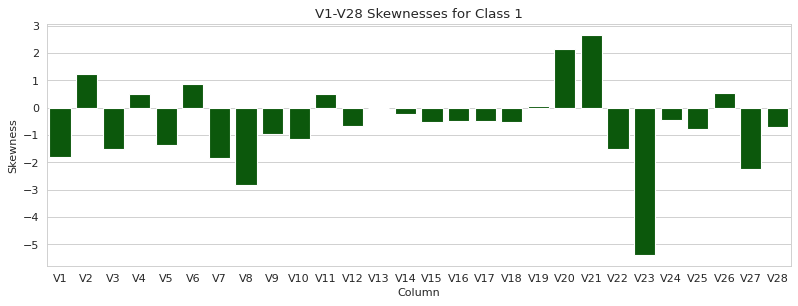

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=t1[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses for Class 1')

From above plot we can see fradulant transaction has more skewness than normal transaction

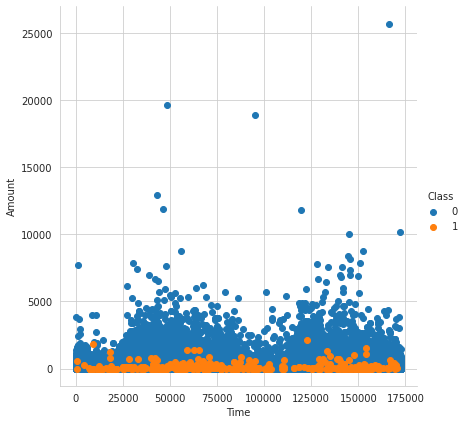

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(train, hue="Class", height = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

Observations:

* From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
* As per with the time, the frauds in the transactions are evenly distributed throughout time.

In [ ]:
FilteredData = train[['Time','Amount', 'Class']]
countLess = FilteredData[FilteredData['Amount'] < 2500]
countMore = train.shape[0] - len(countLess)
percentage = round((len(countLess)/train.shape[0])*100,2)
Class_1 = countLess[countLess['Class'] == 1]
print('Total number for transaction less than 2500 is {}'.format(len(countLess)))
print('Total number for transaction more than 2500 is {}'.format(countMore))
print('{}% of transactions having transaction amount less than 2500' .format(percentage))
print('{} fraud transactions in data where transaction amount is less than 2500' .format(len(Class_1)))

Total number for transaction less than 2500 is 284358
Total number for transaction more than 2500 is 449
99.84% of transactions having transaction amount less than 2500
492 fraud transactions in data where transaction amount is less than 2500


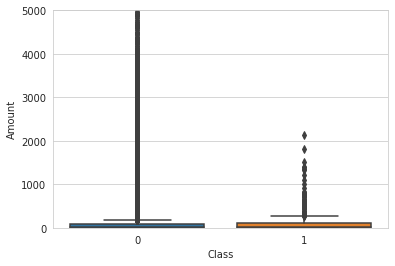

In [ ]:
sns.boxplot(x = "Class", y = "Amount", data = train)
plt.ylim(0, 5000)
plt.show()

Observations:

* There are 284358 transactions which has a transaction amount less than 2500. Means 99.84% of transactions have transaction amount less than 2500
* total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.
* From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 2500. All of the fraud transactions have transaction amount less than 2500. However, there are many transactions which have a transaction amount greater than 2500 and all of them are genuine.

In [ ]:
Amount_0 = train.loc[train['Amount'] == 0]
print(Amount_0['Class'].value_counts())

0    1798
1      27
Name: Class, dtype: int64


There are 1,825 transactions that has 0 amount, 27 of them are fraud. One of the observation is 0 pending charge by a person is a verification method to verify the fraud.

#Data Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
data1=train.copy()
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
# train['scaled_amount'] = rob_scaler.fit_transform(train['Amount'].values.reshape(-1,1))
# train['scaled_time'] = rob_scaler.fit_transform(data1['Time'].values.reshape(-1,1))

train['scaled_amount'] = std_scaler.fit_transform(train['Amount'].values.reshape(-1,1))
train['scaled_time'] = std_scaler.fit_transform(data1['Time'].values.reshape(-1,1))

train.drop(['Amount', 'Time'], axis=1, inplace = True)
scaled_amount = train['scaled_amount']
scaled_time = train['scaled_time']

train.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
train.insert(0, 'scaled_amount', scaled_amount)
train.insert(1, 'scaled_time', scaled_time)
print(train.head())

   scaled_amount  scaled_time        V1  ...       V27       V28  Class
0       0.244964    -1.996583 -1.359807  ...  0.133558 -0.021053      0
1      -0.342475    -1.996583  1.191857  ... -0.008983  0.014724      0
2       1.160686    -1.996562 -1.358354  ... -0.055353 -0.059752      0
3       0.140534    -1.996562 -0.966272  ...  0.062723  0.061458      0
4      -0.073403    -1.996541 -1.158233  ...  0.219422  0.215153      0

[5 rows x 31 columns]


#Analysis  - Are fraudulent transactions of higher value than normal transactions

if fraudulent transactions are in general of higher value than normal transactions or not. To check this lets do a hypothesis test. Lets define our Null and Alternative hypothesis.

>$H_{0}$ : Fraudulent transactions are of similar or higher value as normal transactions

>$H_{A}$ : Fraudulent transactions are of lower value as normal transactions

For the hypothesis test I will be performing a Z-test, with the valid transactions acting as the population. Though a T-test can also be performed but given that our sample set (fraudulent transactions) is of size 492 there shouldn't be any difference, as for sample set >= 30 the t distribution and z distribution are nearly the same.

We will be performing the test for 99% significance level, this means that we should get a z-score of atleast 2.58 or higher. formula for z-score, z−score=(x¯−μ)/S.D


Where

* x¯  : mean of the sample
* μ  : population mean
* S.D : Standard deviation of sampling diatribution

The standard deviation of sampling distribution in our case is given by the formula :  σ/√n , where  σ  is the Standard deviation of the population and n is the sample size

for more info refer this [article](https://towardsdatascience.com/hypothesis-testing-the-what-why-and-how-867d382b99ca)

In [ ]:
population = data1[data1['Class'] == 0].Amount
sample = data1[data1['Class'] == 1].Amount
sampleMean = sample.mean()
populationStd = population.std()
populationMean = population.mean()
z_score = (sampleMean - populationMean) / (populationStd / sample.size ** 0.5)
z_score

3.008289898215099

As the z-score is more than 2.58 we reject the Null hypothesis. So there is a 99% chance that the amount spend on fraudulent transactions are on average significantly lower than normal.

In [ ]:
print(train.head())

   scaled_amount  scaled_time        V1  ...       V27       V28  Class
0       0.244964    -1.996583 -1.359807  ...  0.133558 -0.021053      0
1      -0.342475    -1.996583  1.191857  ... -0.008983  0.014724      0
2       1.160686    -1.996562 -1.358354  ... -0.055353 -0.059752      0
3       0.140534    -1.996562 -0.966272  ...  0.062723  0.061458      0
4      -0.073403    -1.996541 -1.158233  ...  0.219422  0.215153      0

[5 rows x 31 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X = train.drop(['Class'], axis=1)
Y = train['Class']
# This is explicitly used for with data imbalance
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X.shape, Y.shape)

(284807, 30) (284807,)


In [ ]:
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (199364, 30)
X test shape:  (85443, 30)
y train shape:  (199364,)
y test shape:  (85443,)


In [ ]:
print(y_test.value_counts())

0    85307
1      136
Name: Class, dtype: int64


#Model Building

##Model training with Entire dataset

Now we're ready to build machine learning models to predict whether a transaction is fraudulent. We'll train the following models:

* Logistic regression
* Support vector classifier
* Desicision Tree
* Random forest
* Bagging classifier

In [ ]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_classif
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(n_estimators=10, random_state=0),
    "SGDClassifier" : SGDClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "xgb" : XGBClassifier()
}

In [ ]:
def plot(df):
  fraud = df[df['class']==1]
  normal = df[df['class']==0]
  fraud.drop(['class'],axis=1,inplace=True)
  normal.drop(['class'],axis=1,inplace=True)
  fraud = fraud.set_index('classifier')
  normal = normal.set_index('classifier')
  plt.figure(figsize = (8,2))
  sns.heatmap(fraud.iloc[:, :], annot=True, cmap=sns.light_palette((210, 90, 60), input="husl"),linewidth=2)
  plt.title('class 1')
  plt.show()
  plt.figure(figsize = (8,2))
  sns.heatmap(normal.iloc[:, :], annot=True, cmap=sns.light_palette((210, 90, 60), input="husl"),linewidth=2)
  plt.title('class 0')
  plt.show()

In [ ]:
def roc_curve(y_test, rdict):
  sns.set_style('whitegrid')
  plt.figure()
  i=0
  fig, ax = plt.subplots(4,2,figsize=(16,30))
  for key,val in rdict.items():
    fpr, tpr, thresholds = metrics.roc_curve( y_test, val,
                                                  drop_intermediate = False )
    auc_score = metrics.roc_auc_score( y_test, val)
    i+= 1
    plt.subplot(4,2,i)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(key)
    plt.legend(loc="lower right")
  plt.show()

In [ ]:
def training(models, x, y, x_t, y_t):
    conf = []
    comp = []
    rdict = {}
    for key, model in models.items():
      model = model.fit(x, y)
      y_pred = model.predict(x_t)
      rdict[key] = y_pred
      tn, fp, fn, tp = confusion_matrix(y_t, y_pred).ravel()
      precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_t, y_pred)
      r1 = {'Classifier': key, 'TN': tn, 'TP': tp, 'FN': fn, 'FP': fp}
      conf.append(r1)
      MCC = matthews_corrcoef(y_t, y_pred)
      AUROC = roc_auc_score(y_t, y_pred)
      Cohen_kappa = cohen_kappa_score(y_t, y_pred)
      accuracy = metrics.accuracy_score(y_t, y_pred)
      r2 = {'classifier': key,'matthews_corrcoef':MCC,'Cohen_kappa':Cohen_kappa,'accuracy': accuracy,'AUROC':AUROC, 'precision': precision[0],'recall':recall[0],'f1':fscore[0], 'class':0}
      r3 = {'classifier': key,'matthews_corrcoef':MCC,'Cohen_kappa':Cohen_kappa,'accuracy': accuracy,'AUROC':AUROC, 'precision': precision[1],'recall':recall[1],'f1':fscore[1], 'class':1}
      comp.append(r2)
      comp.append(r3)
    r11 = (pd.DataFrame(conf).to_markdown())
    r12 = pd.DataFrame(comp)
    print(f'\n\nRoc curve \n\n')
    roc_curve(y_t, rdict)
    print(f'\n\n confusion matrixs comparison \n\n')
    print(r11)
    print(f'\n\n Performance comparison \n\n')
    plot(r12)
    



Roc curve 




<Figure size 432x288 with 0 Axes>

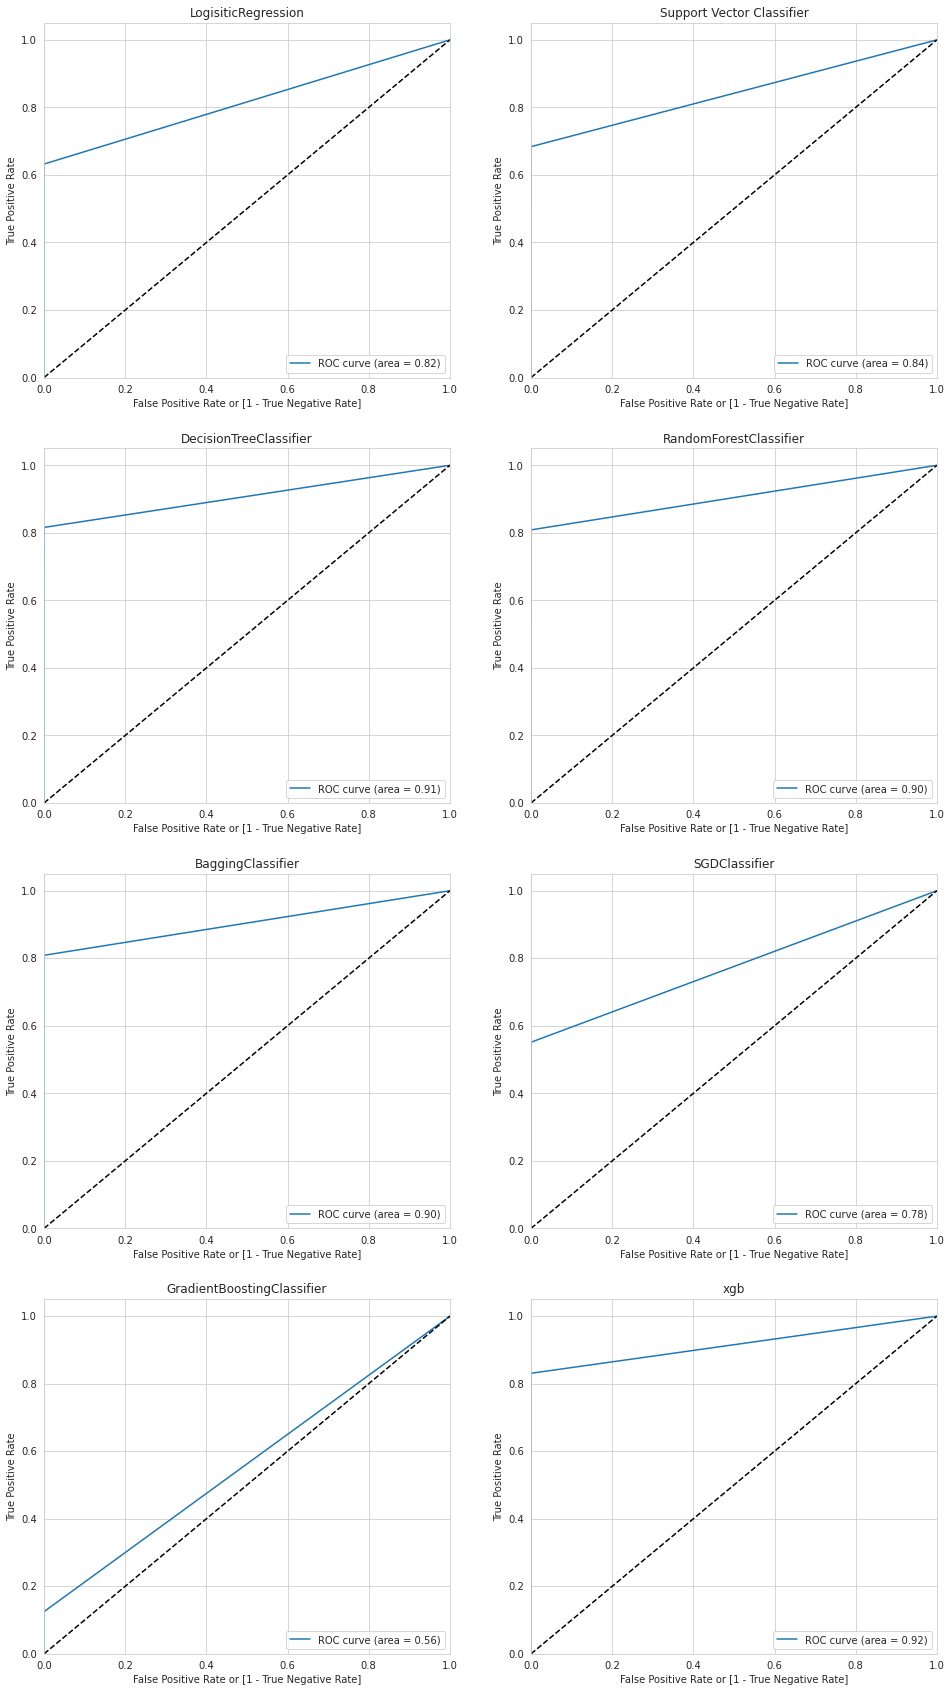



 confusion matrixs comparison 


|    | Classifier                 |    TN |   TP |   FN |   FP |
|---:|:---------------------------|------:|-----:|-----:|-----:|
|  0 | LogisiticRegression        | 85295 |   86 |   50 |   12 |
|  1 | Support Vector Classifier  | 85300 |   93 |   43 |    7 |
|  2 | DecisionTreeClassifier     | 85260 |  111 |   25 |   47 |
|  3 | RandomForestClassifier     | 85299 |  110 |   26 |    8 |
|  4 | BaggingClassifier          | 85300 |  110 |   26 |    7 |
|  5 | SGDClassifier              | 85293 |   75 |   61 |   14 |
|  6 | GradientBoostingClassifier | 85305 |   17 |  119 |    2 |
|  7 | xgb                        | 85300 |  113 |   23 |    7 |


 Performance comparison 




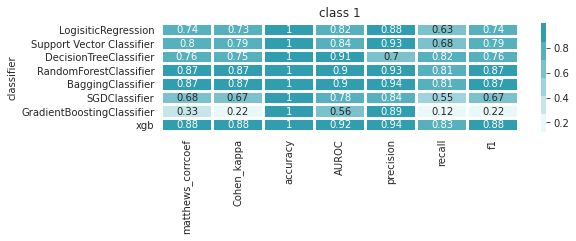

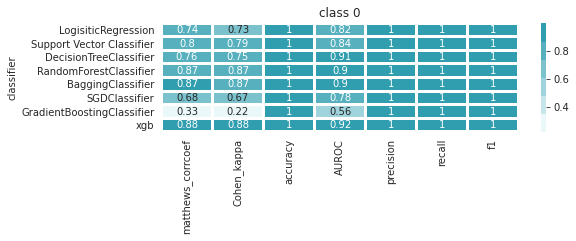

In [ ]:
training(classifiers, X_train, y_train, X_test, y_test)

**conclusion**:

The random forest and bagging classifier performed much better than the Logistic regression, support vector machine and Decision Tree, with and without any hyperparameter tweaking!

Now lets train a model with selected features

##Model Training with only selected feature

In [ ]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
featureScores_df = featureScores.sort_values(['Score', 'Specs'], ascending=[False, True])  #naming the dataframe columns
print(featureScores_df)

            Specs         Score
18            V17  33979.168593
15            V14  28695.547788
13            V12  20749.822361
11            V10  14057.979985
17            V16  11443.349428
4              V3  11014.508305
8              V7  10349.605408
12            V11   6999.355047
5              V4   5163.832114
19            V18   3584.380605
2              V1   2955.668946
10             V9   2746.600273
6              V5   2592.357929
3              V2   2393.401678
7              V6    543.510578
22            V21    465.916251
20            V19    344.990997
21            V20    114.999731
9              V8    112.548287
28            V27     88.045296
1     scaled_time     43.252998
29            V28     25.901405
25            V24     14.850932
0   scaled_amount      9.033345
14            V13      5.947672
27            V26      5.653653
16            V15      5.080193
26            V25      3.116062
24            V23      2.053476
23            V22      0.184706


In [ ]:
col = ['V17', 'V14', 'V12','V10','V16','V3','V7','V11','V4','V18','V1','V9','V5','V2','V6','V21','V19','V20','V8','V27','scaled_time','V28','V24']



Roc curve 




<Figure size 432x288 with 0 Axes>

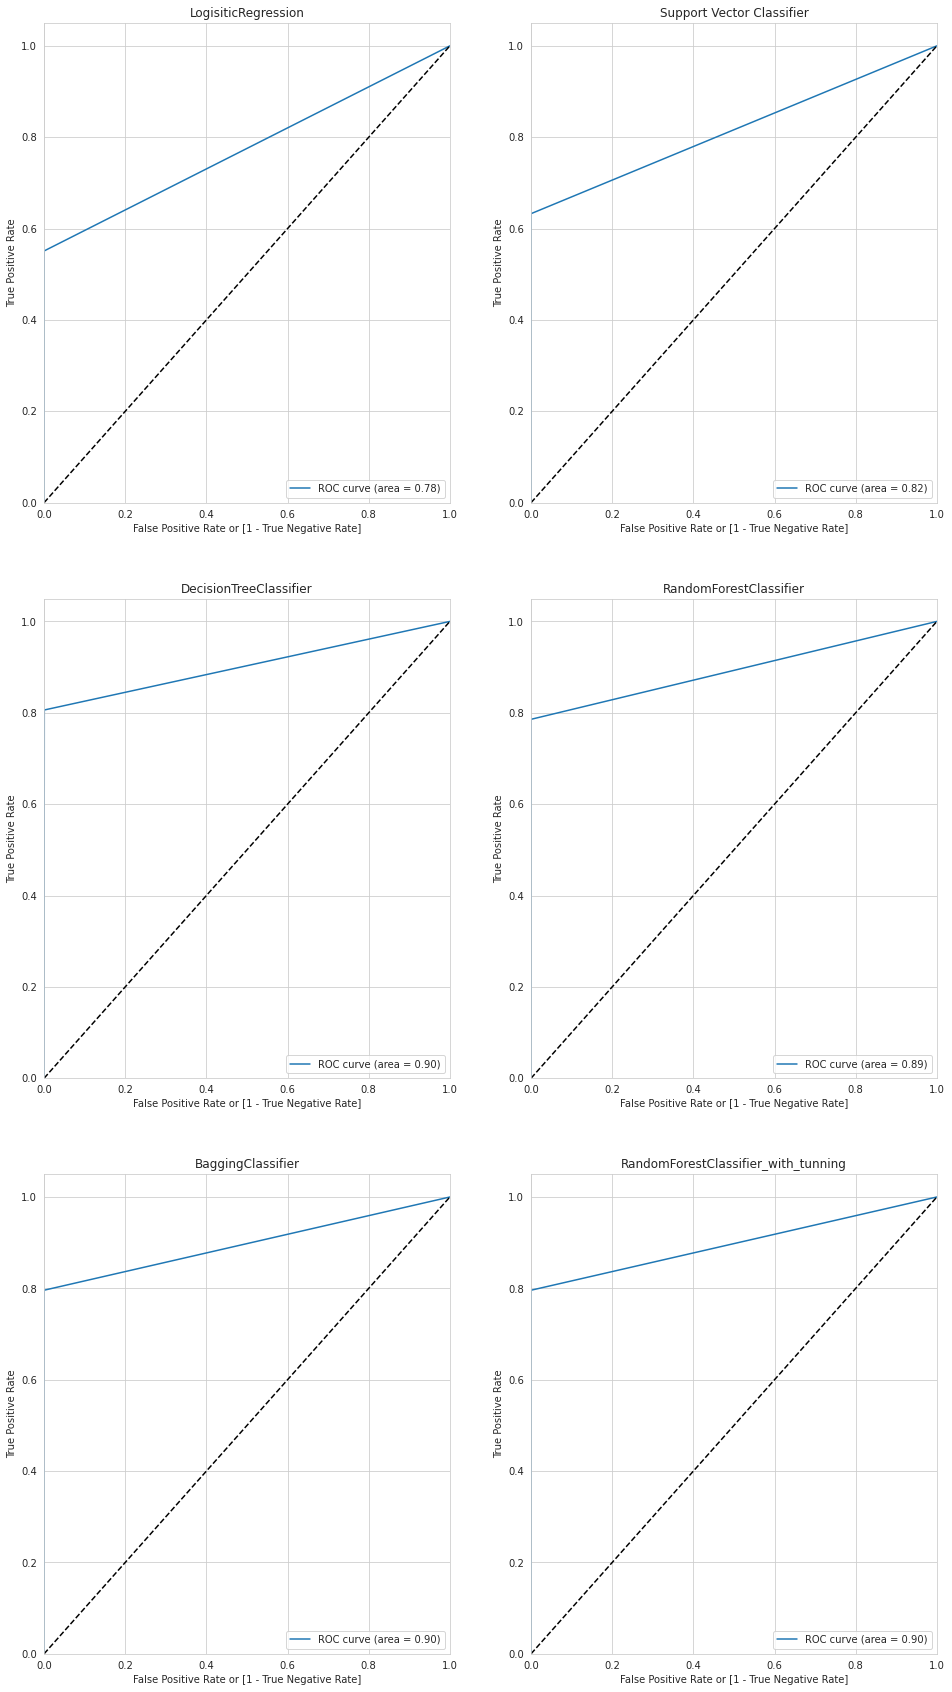



 confusion matrixs comparision 


|    | Classifier                          |    TN |   TP |   FN |   FP |
|---:|:------------------------------------|------:|-----:|-----:|-----:|
|  0 | LogisiticRegression                 | 56855 |   54 |   44 |    9 |
|  1 | Support Vector Classifier           | 56861 |   62 |   36 |    3 |
|  2 | DecisionTreeClassifier              | 56832 |   79 |   19 |   32 |
|  3 | RandomForestClassifier              | 56860 |   77 |   21 |    4 |
|  4 | BaggingClassifier                   | 56862 |   78 |   20 |    2 |
|  5 | RandomForestClassifier_with_tunning | 56862 |   78 |   20 |    2 |


 Performance comparision 




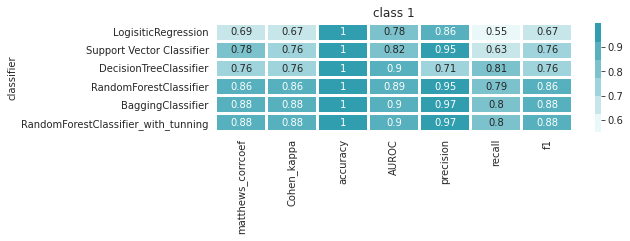

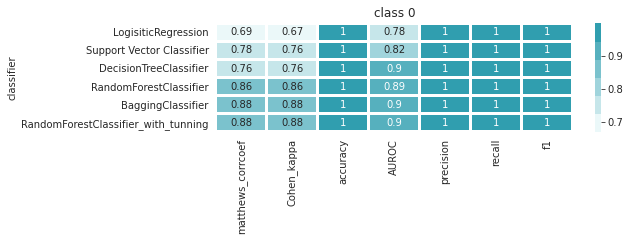

In [ ]:
training(classifiers, X_train[col], y_train, X_test[col], y_test)

**Conclusion**

* The performance of the model slightly increased after removing the few parameters like Amount, V13, V15, V22, V23, V25.
* As per the Hypothesis testing a the random forest and bagging classifier performed much better than the Logistic regression, support vector machine and Decision Tree, with and without any hyperparameter tweaking!and from the training result we can conclude that amount variable is not impacting the prediction.
* The random forest and bagging classifier performed much better than the Logistic regression, support vector machine, and Decision Tree, with and without any hyperparameter tweaking!

#**Resampling techniques**

##Under-Sampling

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing i

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


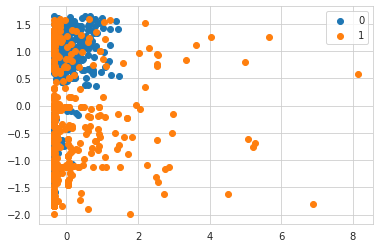

In [ ]:
# Undersample imbalanced dataset with NearMiss
from collections import Counter
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where 
undersample = NearMiss(version=1, n_neighbors=3, random_state=42)
# transform the dataset
x_under1, y_under1 = undersample.fit_resample(X, Y)
# summarize the new class distribution
counter = Counter(y_under1)
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_under1)))
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_under1 == label)[0]
	pyplot.scatter(x_under1[row_ix, 0], x_under1[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression





Roc curve 




<Figure size 432x288 with 0 Axes>

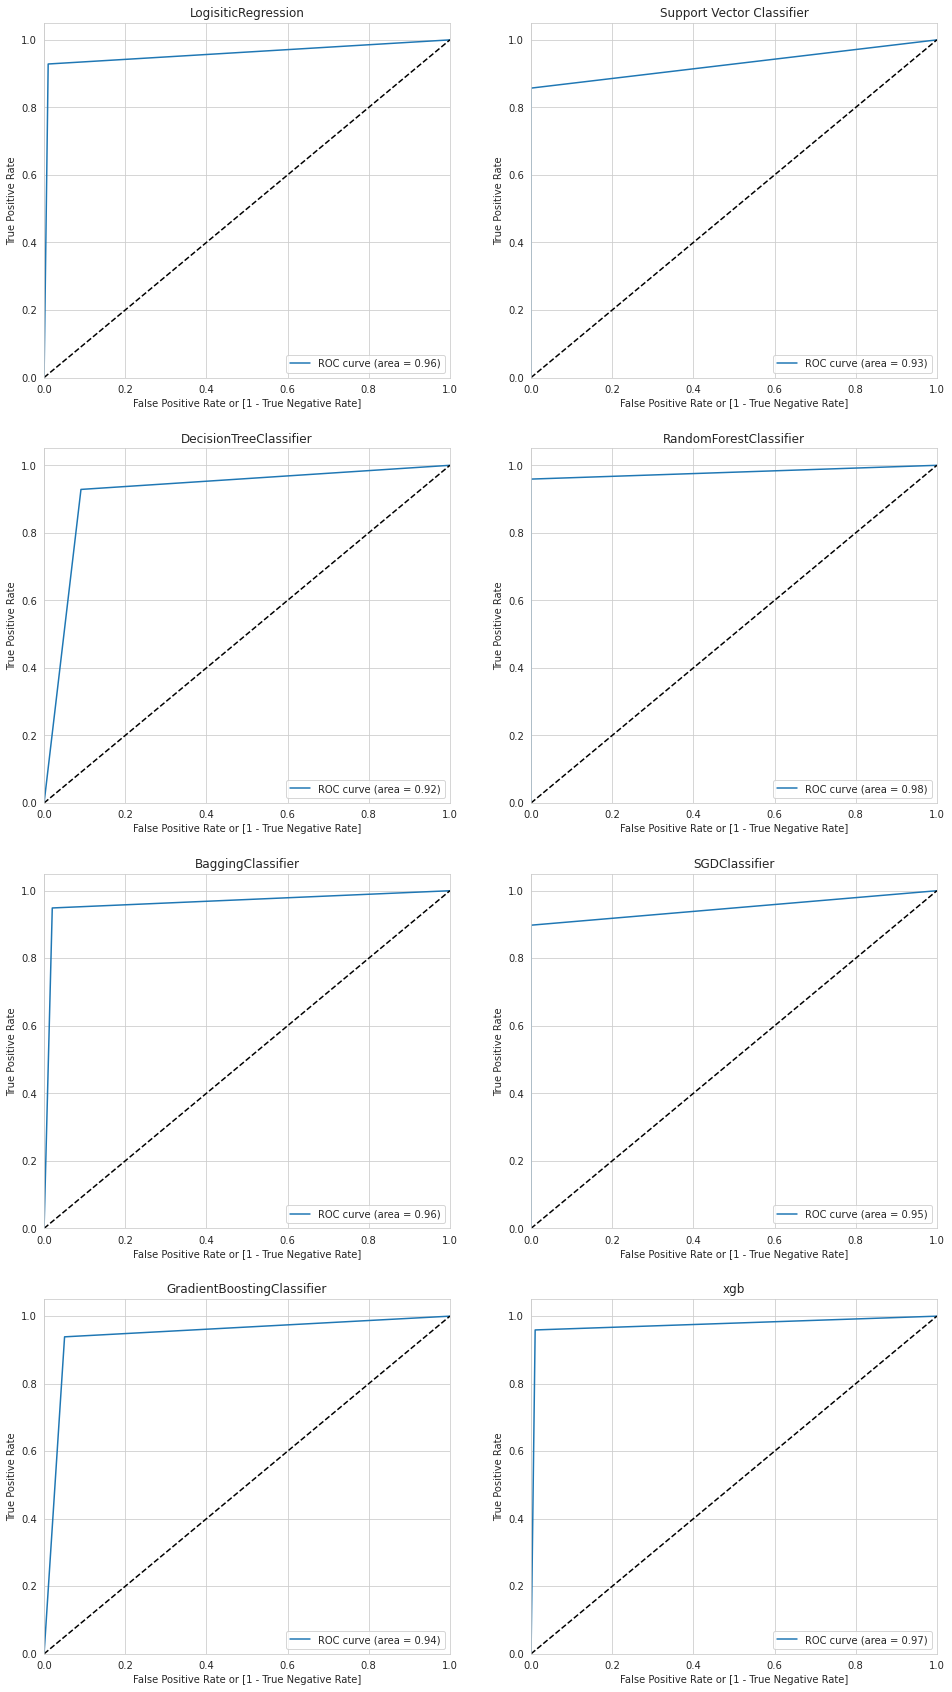



 confusion matrixs comparison 


|    | Classifier                 |   TN |   TP |   FN |   FP |
|---:|:---------------------------|-----:|-----:|-----:|-----:|
|  0 | LogisiticRegression        |   98 |   91 |    7 |    1 |
|  1 | Support Vector Classifier  |   99 |   84 |   14 |    0 |
|  2 | DecisionTreeClassifier     |   90 |   91 |    7 |    9 |
|  3 | RandomForestClassifier     |   99 |   94 |    4 |    0 |
|  4 | BaggingClassifier          |   97 |   93 |    5 |    2 |
|  5 | SGDClassifier              |   99 |   88 |   10 |    0 |
|  6 | GradientBoostingClassifier |   94 |   92 |    6 |    5 |
|  7 | xgb                        |   98 |   94 |    4 |    1 |


 Performance comparison 




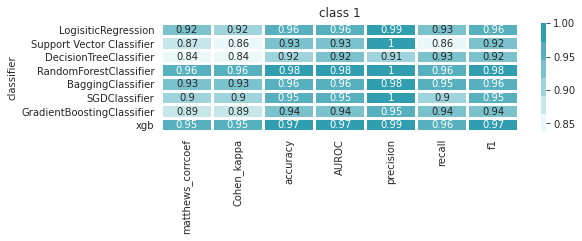

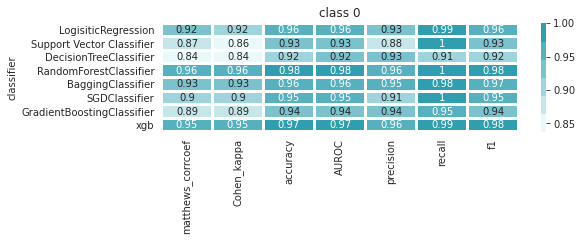

In [ ]:
X_under_df1 = pd.DataFrame(x_under1, columns = X_train.columns)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under_df1[col], y_under1, test_size=0.2, random_state=42)
training(classifiers, X_train_u[col], y_train_u, X_test_u[col], y_test_u)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


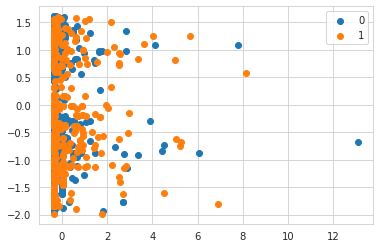

In [ ]:
undersample = NearMiss(version=2, n_neighbors=3, random_state=42)
# transform the dataset
x_under2, y_under2 = undersample.fit_resample(X, Y)
# summarize the new class distribution
counter = Counter(y_under2)
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_under2)))
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_under2 == label)[0]
	pyplot.scatter(x_under2[row_ix, 0], x_under2[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression





Roc curve 




<Figure size 432x288 with 0 Axes>

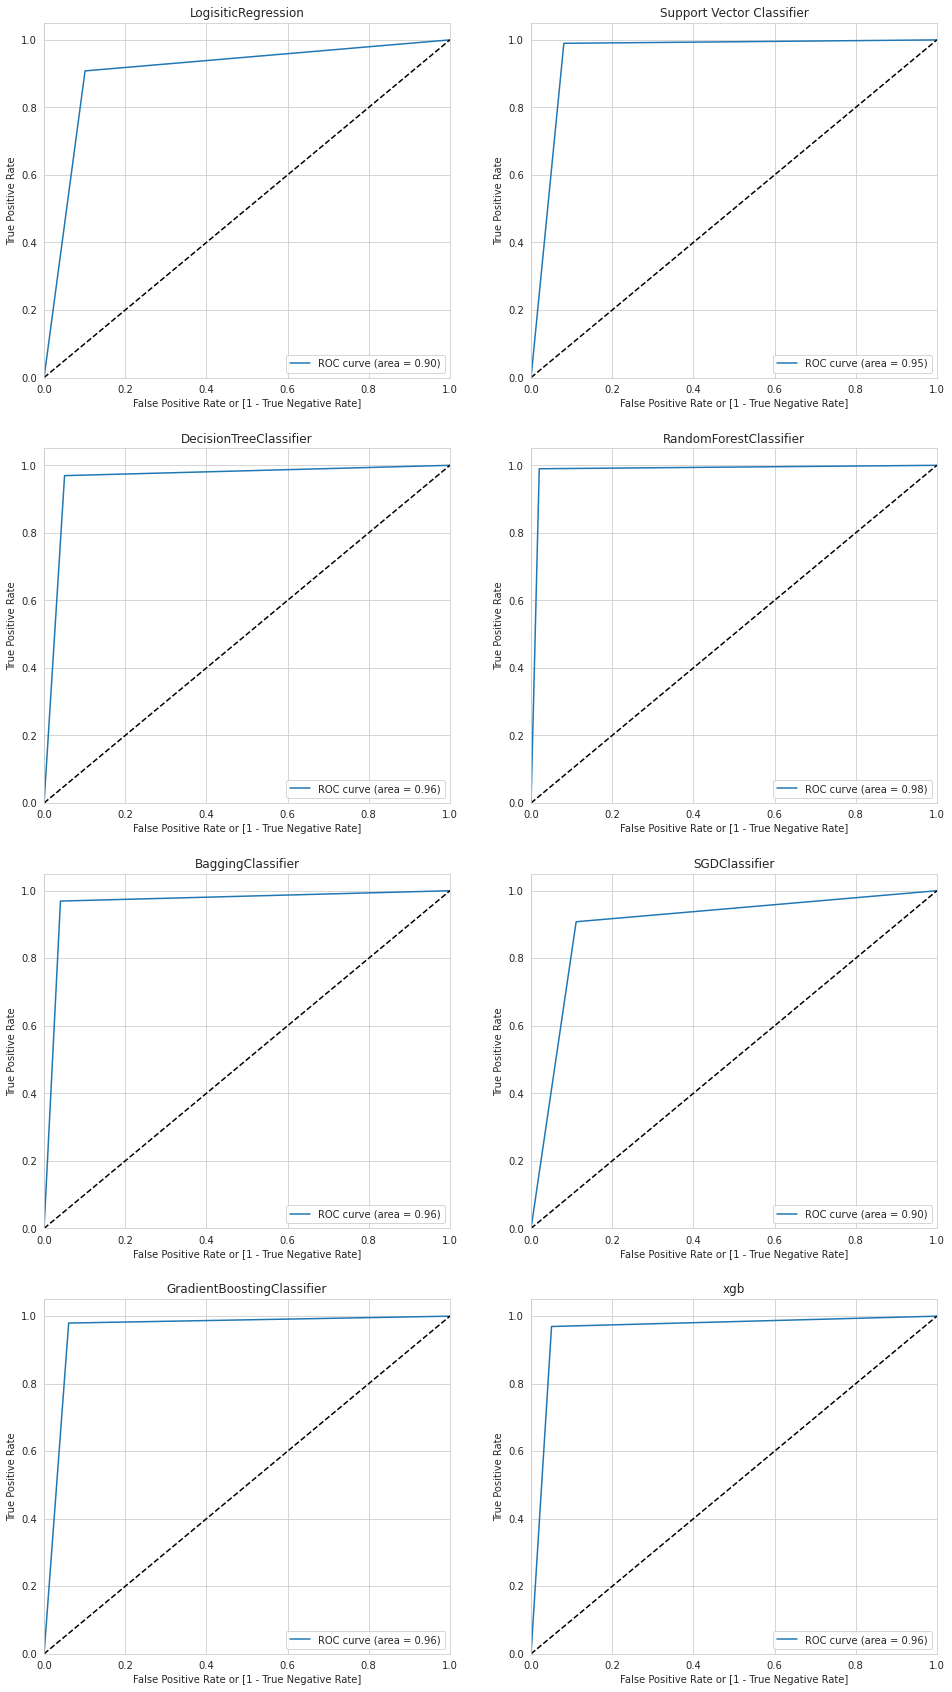



 confusion matrixs comparison 


|    | Classifier                 |   TN |   TP |   FN |   FP |
|---:|:---------------------------|-----:|-----:|-----:|-----:|
|  0 | LogisiticRegression        |   89 |   89 |    9 |   10 |
|  1 | Support Vector Classifier  |   91 |   97 |    1 |    8 |
|  2 | DecisionTreeClassifier     |   94 |   95 |    3 |    5 |
|  3 | RandomForestClassifier     |   97 |   97 |    1 |    2 |
|  4 | BaggingClassifier          |   95 |   95 |    3 |    4 |
|  5 | SGDClassifier              |   88 |   89 |    9 |   11 |
|  6 | GradientBoostingClassifier |   93 |   96 |    2 |    6 |
|  7 | xgb                        |   94 |   95 |    3 |    5 |


 Performance comparison 




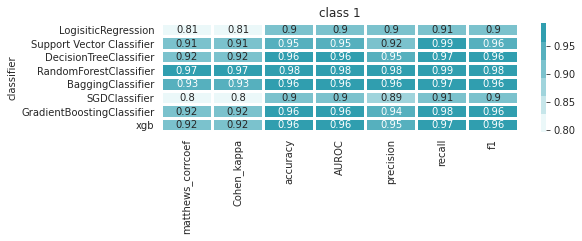

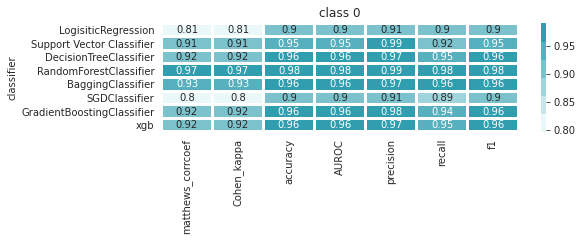

In [ ]:
X_under_df2 = pd.DataFrame(x_under2, columns = X_train.columns)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under_df2[col], y_under2, test_size=0.2, random_state=42)
training(classifiers, X_train_u, y_train_u, X_test_u, y_test_u)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({1: 492, 0: 409})


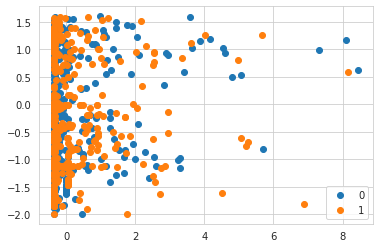

In [ ]:
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors=3, random_state=42)
# transform the dataset
x_under3, y_under3 = undersample.fit_resample(X, Y)
# summarize the new class distribution
counter = Counter(y_under3)
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_under3)))
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_under3 == label)[0]
	pyplot.scatter(x_under3[row_ix, 0], x_under3[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()



Roc curve 




<Figure size 432x288 with 0 Axes>

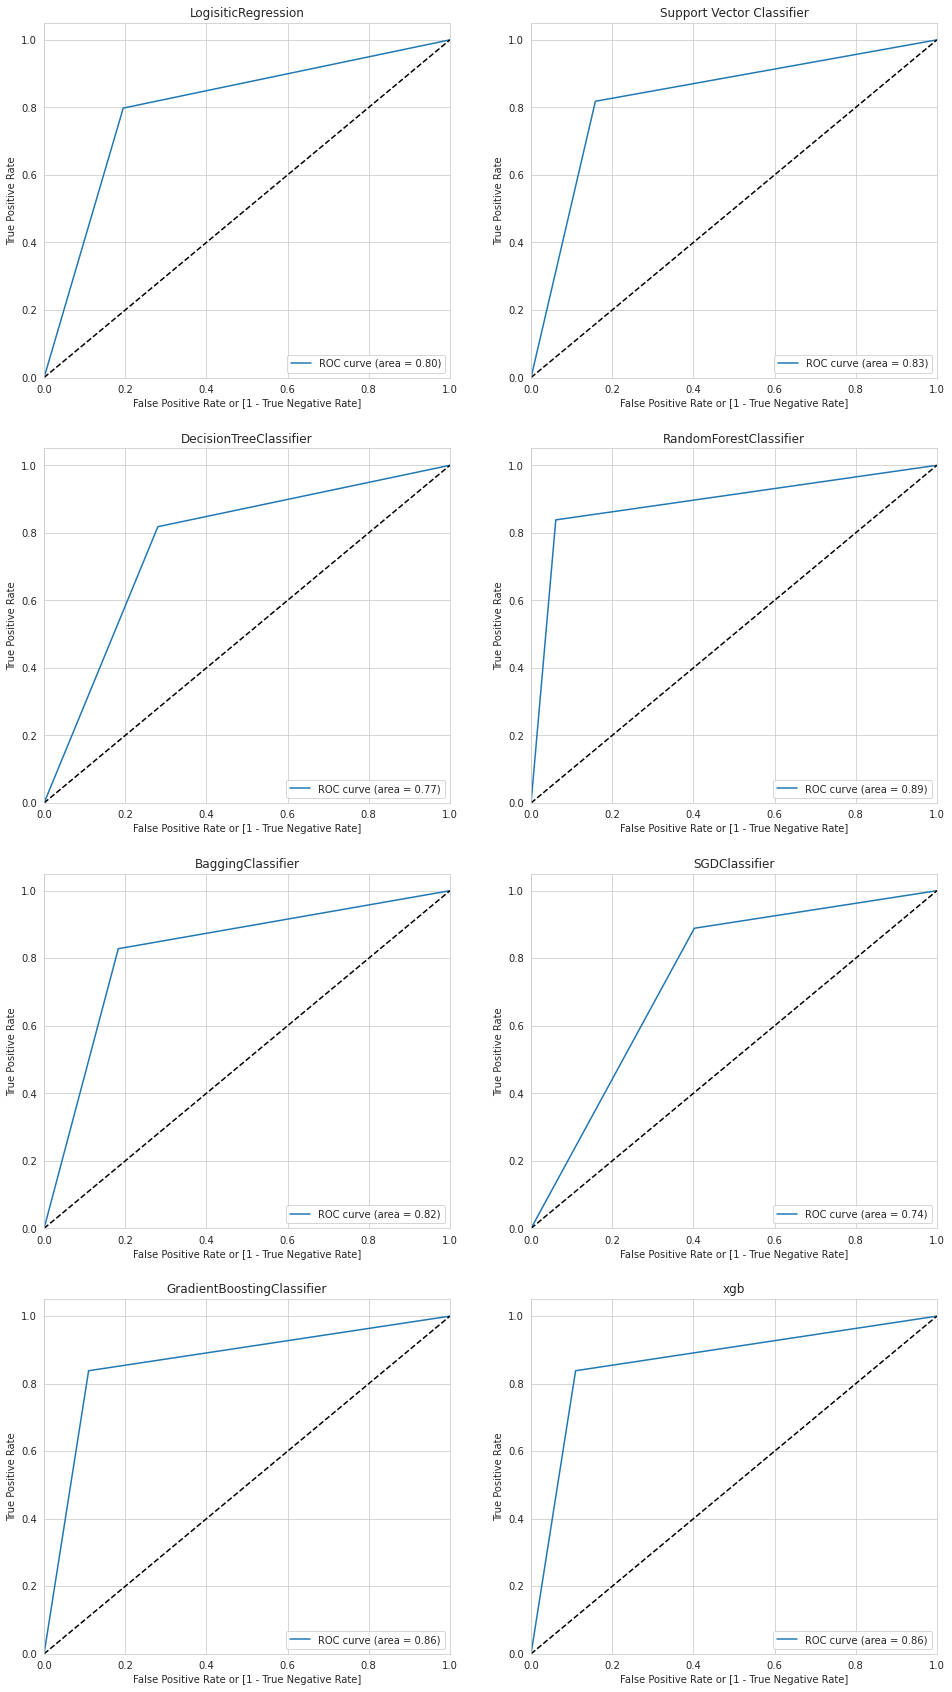



 confusion matrixs comparison 


|    | Classifier                 |   TN |   TP |   FN |   FP |
|---:|:---------------------------|-----:|-----:|-----:|-----:|
|  0 | LogisiticRegression        |   66 |   79 |   20 |   16 |
|  1 | Support Vector Classifier  |   69 |   81 |   18 |   13 |
|  2 | DecisionTreeClassifier     |   59 |   81 |   18 |   23 |
|  3 | RandomForestClassifier     |   77 |   83 |   16 |    5 |
|  4 | BaggingClassifier          |   67 |   82 |   17 |   15 |
|  5 | SGDClassifier              |   49 |   88 |   11 |   33 |
|  6 | GradientBoostingClassifier |   73 |   83 |   16 |    9 |
|  7 | xgb                        |   73 |   83 |   16 |    9 |


 Performance comparison 




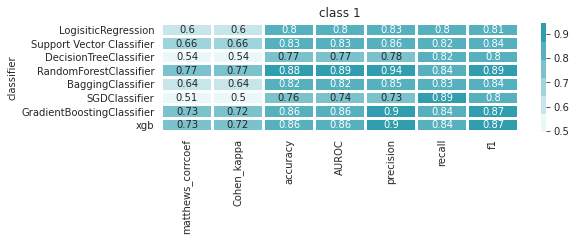

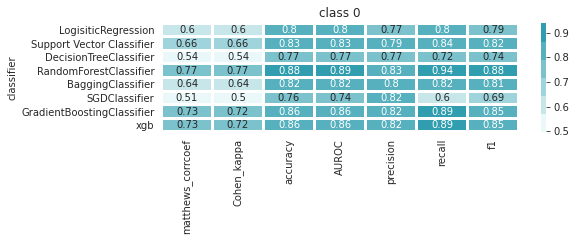

In [ ]:
X_under_df3 = pd.DataFrame(x_under3, columns = X_train.columns)
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under_df3[col], y_under3, test_size=0.2, random_state=42)
training(classifiers, X_train_u, y_train_u, X_test_u, y_test_u)

**conclusion**

* I have tried all 3 variations of near-miss techniques, where near miss 1 with random forest gives the best result than the rest all algorithm. 

##Over-sampling

In [ ]:
#Create independent and Dependent Features
columns = train.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = train[columns]
Y = train[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


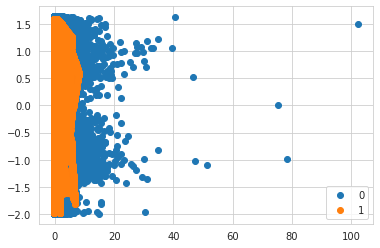

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
x_over, y_over = oversample.fit_resample(X, Y)
# summarize the new class distribution
counter = Counter(y_over)
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_over)))
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_over == label)[0]
	pyplot.scatter(x_over[row_ix, 0], x_over[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
x_over.shape,y_over.shape

((568630, 30), (568630,))

In [ ]:
X_over_df1 = pd.DataFrame(x_over, columns = X_train.columns)
# This is explicitly used for oversampling.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_over_df1[col], y_over, test_size=0.2, random_state=42)

In [ ]:
print('X train shape: ', X_train1.shape)
print('X test shape: ', X_test1.shape)
print('y train shape: ', y_train1.shape)
print('y test shape: ', y_test1.shape)

X train shape:  (454904, 28)
X test shape:  (113726, 28)
y train shape:  (454904,)
y test shape:  (113726,)




Roc curve 




<Figure size 432x288 with 0 Axes>

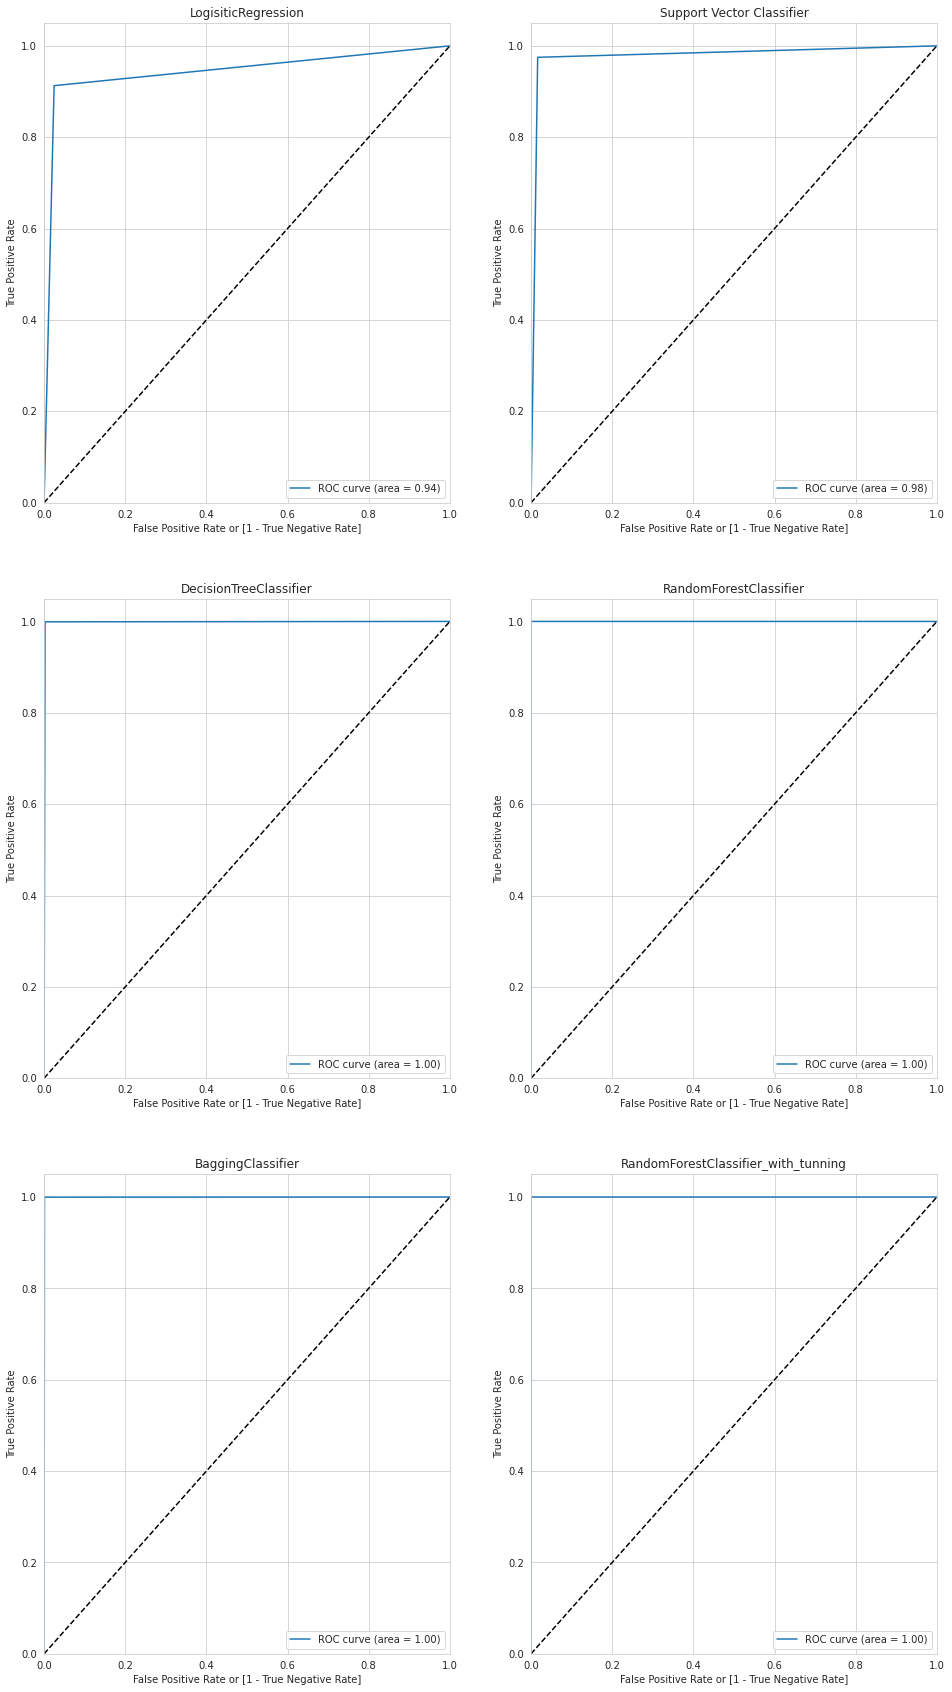



 confusion matrixs comparison 


|    | Classifier                          |    TN |    TP |   FN |   FP |
|---:|:------------------------------------|------:|------:|-----:|-----:|
|  0 | LogisiticRegression                 | 55346 | 52010 | 4966 | 1404 |
|  1 | Support Vector Classifier           | 55824 | 55546 | 1430 |  926 |
|  2 | DecisionTreeClassifier              | 56615 | 56924 |   52 |  135 |
|  3 | RandomForestClassifier              | 56737 | 56976 |    0 |   13 |
|  4 | BaggingClassifier                   | 56694 | 56959 |   17 |   56 |
|  5 | RandomForestClassifier_with_tunning | 56738 | 56976 |    0 |   12 |


 Performance comparison 




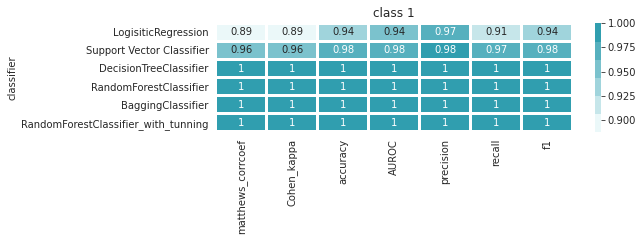

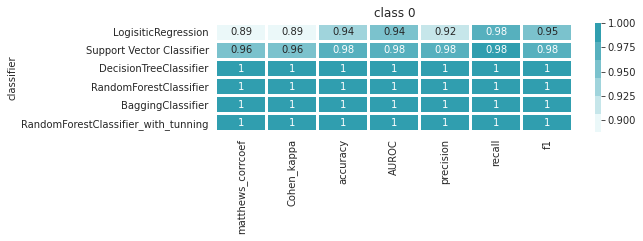

In [ ]:
training(classifiers, X_train1, y_train1, X_test1, y_test1)

# Hyperparameter Tuning with GridsearchCV and RandomsearchCV

###Tuning max_depth

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
MCC_scorer = make_scorer(matthews_corrcoef)

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=MCC_scorer,
                  return_train_score='warn')
rf.fit(X_train[col], y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.344033,0.069057,0.220459,0.001273,2,{'max_depth': 2},0.713103,0.715635,0.681647,0.665385,0.731980,0.701550,0.024339,4,0.705606,0.708292,0.706228,0.715025,0.686802,0.704391,0.009408
1,93.812806,0.293309,0.318396,0.052138,7,{'max_depth': 7},0.837327,0.819369,0.813119,0.857665,0.866633,0.838822,0.020832,3,0.894651,0.894377,0.892658,0.894298,0.890771,0.893351,0.001468
2,155.485858,0.792690,0.410489,0.007009,12,{'max_depth': 12},0.859783,0.834293,0.828487,0.865004,0.873876,0.852288,0.017744,1,0.917355,0.920541,0.923987,0.917082,0.922266,0.920246,0.002703
3,195.715286,3.791511,0.506797,0.003185,17,{'max_depth': 17},0.837327,0.834293,0.836066,0.865004,0.880200,0.850578,0.018638,2,0.946260,0.967680,0.951111,0.937647,0.946084,0.949756,0.009954


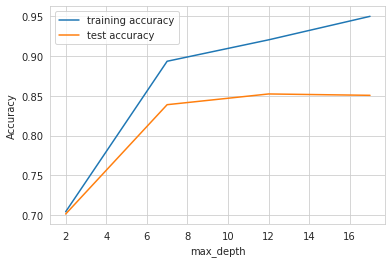

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


SCALAR METRICS
 Confusion matrix
[[56862     2]
 [   22    76]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

('MCC', 0.8690748763736589)
('AUPRC', 0.756011549447775)
('AUROC', 0.8877375162220206)
("Cohen's kappa", 0.8634280996728879)
('Accuracy', 0.9995786664794073)


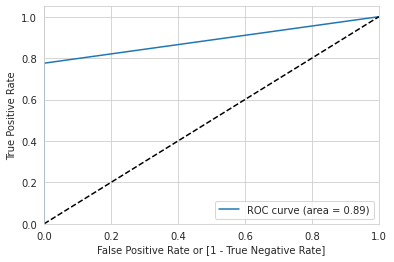

In [ ]:
y_pred1 = rf.predict(X_test[col])
print('SCALAR METRICS')
print(' Confusion matrix')
print(confusion_matrix(y_test, y_pred1))
print('classification report')
print(classification_report( y_test, y_pred1))
print(('MCC', matthews_corrcoef(y_test, y_pred1)))
print(('AUPRC', average_precision_score(y_test, y_pred1)))
print(('AUROC', roc_auc_score(y_test, y_pred1)))
print(("Cohen's kappa", cohen_kappa_score(y_test, y_pred1)))
print(('Accuracy', accuracy_score(y_test, y_pred1)))
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred1,
                                        drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_test, y_pred1 )
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
# plt.title(model.__class__.__name__,)
plt.legend(loc="lower right")
plt.show()

###Tuning n_estimators

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=MCC_scorer,
                  return_train_score='warn')
rf.fit(X_train[col], y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,55.245955,0.064165,0.250600,0.002690,100,{'n_estimators': 100},0.792278,0.803366,0.781498,0.749876,0.819998,0.789403,0.023512,4,0.833751,0.816854,0.831275,0.825755,0.815688,0.824665,0.007335
1,275.085766,0.256771,1.033403,0.006590,500,{'n_estimators': 500},0.828343,0.789520,0.781498,0.774595,0.819998,0.798791,0.021417,1,0.833372,0.826469,0.840553,0.821697,0.819768,0.828372,0.007689
2,494.367467,0.843113,1.763592,0.013803,900,{'n_estimators': 900},0.806453,0.780542,0.781498,0.775989,0.827563,0.794409,0.019711,3,0.831475,0.828379,0.833386,0.822143,0.821697,0.827416,0.004766
3,711.589988,1.711776,2.564517,0.136976,1300,{'n_estimators': 1300},0.812844,0.788588,0.781498,0.775989,0.819998,0.795784,0.017465,2,0.827666,0.826469,0.829579,0.825755,0.819768,0.825848,0.003304


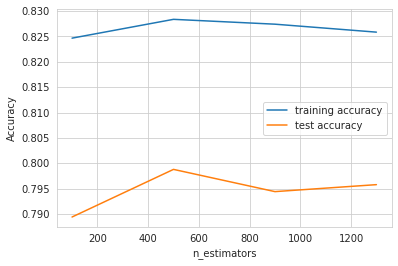

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

SCALAR METRICS
 Confusion matrix
[[56859     5]
 [   32    66]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.67      0.78        98

    accuracy                           1.00     56962
   macro avg       0.96      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962

('MCC', 0.7909370810393881)
('AUPRC', 0.6266037441096645)
('AUROC', 0.8366907293305618)
("Cohen's kappa", 0.7807481423980163)
('Accuracy', 0.9993504441557529)


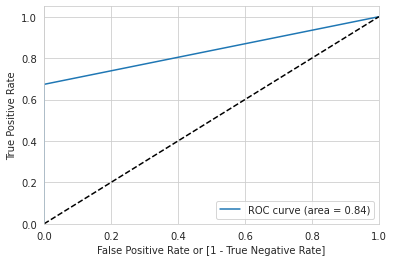

In [ ]:
y_pred1 = rf.predict(X_test[col])
print('SCALAR METRICS')
print(' Confusion matrix')
print(confusion_matrix(y_test, y_pred1))
print('classification report')
print(classification_report( y_test, y_pred1))
print(('MCC', matthews_corrcoef(y_test, y_pred1)))
print(('AUPRC', average_precision_score(y_test, y_pred1)))
print(('AUROC', roc_auc_score(y_test, y_pred1)))
print(("Cohen's kappa", cohen_kappa_score(y_test, y_pred1)))
print(('Accuracy', accuracy_score(y_test, y_pred1)))
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred1,
                                        drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_test, y_pred1 )
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
# plt.title(model.__class__.__name__,)
plt.legend(loc="lower right")
plt.show()

###Tuning max_features

In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=MCC_scorer,
                  return_train_score='warn')
rf.fit(X_train[col], y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,44.260197,0.086088,0.239227,0.001958,4,{'max_features': 4},0.789046,0.748573,0.748573,0.719210,0.808501,0.762781,0.031882,5,0.816137,0.809357,0.790054,0.796748,0.798828,0.802225,0.009317
1,85.549092,0.144969,0.235712,0.002378,8,{'max_features': 8},0.798139,0.789520,0.789520,0.844540,0.840938,0.812531,0.024891,4,0.845035,0.843755,0.860714,0.837177,0.840950,0.845526,0.008059
2,147.177551,0.433586,0.238820,0.002789,14,{'max_features': 14},0.825250,0.812258,0.805328,0.851967,0.836775,0.826316,0.016773,2,0.864578,0.850973,0.861221,0.857351,0.848447,0.856514,0.006061
3,208.632415,0.179092,0.239295,0.002788,20,{'max_features': 20},0.825250,0.827666,0.797462,0.851967,0.842501,0.828969,0.018548,1,0.859204,0.854921,0.873251,0.861221,0.849112,0.859542,0.008012
4,250.633285,0.683630,0.242919,0.003195,24,{'max_features': 24},0.825250,0.814176,0.789520,0.851967,0.831165,0.822415,0.020532,3,0.862877,0.858611,0.880378,0.863058,0.856085,0.864202,0.008507


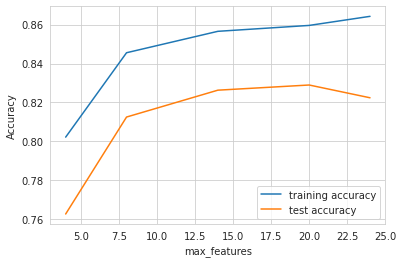

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
MCC_scorer = make_scorer(matthews_corrcoef)
n_folds=3
C = np.logspace(0, 4, num=10)
# penalty = ['l1', 'l2']
# solver = ['liblinear', 'saga']
# C = np.logspace(0, 4, num=10)
# penalty = ['l1', 'l2']
# solver = ['liblinear', 'saga']

# hyperparameters = dict(C=C, penalty=penalty, solver=solver)
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperparameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

rf = RandomForestClassifier()

randomizedsearch = RandomizedSearchCV(rf, hyperparameters, 
                    cv=n_folds, 
                   scoring=MCC_scorer,
                  return_train_score='warn', random_state=42)
best_model_random = randomizedsearch.fit(X_train,y_train)
print(best_model_random.best_estimator_)



KeyboardInterrupt: ignored

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': [75, 100, 300, 500, 800, 1200]}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring=MCC_scorer,
                  return_train_score='warn')
rf.fit(X_train[col], y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.



KeyboardInterrupt: ignored